## **Members Data:**

- Riham Mohamed 201901639
- Hajar Alshafai 201900537

**Very Important Note:**

**All reports, and presentation are submitted through this Link.**


https://drive.google.com/drive/folders/1lMPTXGMqszX967U431KWOhb4NDHjv3WI?usp=sharing

# **Imports:**

In [ ]:
import csv
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# **Part 1: Data Collection and cleaning**

## **1.1 Data Collection**

### **Personal Population:**


**All interviewed people**

In [ ]:
r=requests.get('https://data.ojp.usdoj.gov/resource/r4j4-fdwx.csv?$limit=10000000')
with open('Personal population .csv',mode='w') as fhand:
    fhand.write(r.text)

In [ ]:
Personal_population = pd.read_csv('Personal population .csv')

### **Personal Victimization:**

In [ ]:
r=requests.get("https://data.ojp.usdoj.gov/resource/gcuy-rt5g.csv?$limit=10000000")
with open('Personal Victimization.csv',mode='w') as fhand:
    fhand.write(r.text)

In [ ]:
Personal_Victimization = pd.read_csv('Personal Victimization.csv')

### **Georgea data:**


In [ ]:
r=requests.get("https://data.ojp.usdoj.gov/resource/ynf5-u8nk.csv?$limit=1000000")
with open('Georgea data.csv',mode='w') as fhand:
    fhand.write(r.text)

In [ ]:
Georgea_data = pd.read_csv('Georgea data.csv')

### **Firearm Data:**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Fire_arm=pd.read_excel('/content/drive/MyDrive/Firearm.xlsx')

### **FBI:**


In [ ]:
#XPhz5cbsrJo1NxI8EJOY4uACQzdhgjzp70fwyp4n
r=requests.get(f"https://api.usa.gov/crime/fbi/sapi/api/agencies?API_KEY=XPhz5cbsrJo1NxI8EJOY4uACQzdhgjzp70fwyp4n").json()
stat=pd.DataFrame.from_dict(r)
States=stat.columns
offense=["aggravated-assault","all-other-larceny","all-other-offenses","animal-cruelty","arson,assisting-or-promoting-prostitution","bad-checks","betting","bribery","burglary-breaking-and-entering","counterfeiting-forgery","credit-card-automated-teller-machine-fraud","destruction-damage-vandalism-of-property","driving-under-the-influence","drug-equipment-violations","drug-violations","drunkenness","embezzlement","extortion-blackmail","false-pretenses-swindle-confidence-game","fondling","gambling-equipment-violation","hacking-computer-invasion","human-trafficking-commerical-sex-acts","human-trafficking-commerical-involuntary-servitude","identity-theft","impersonation","incest,intimidation","justifiable-homicide","kidnapping-abduction","motor-vehicle-theft","murder-and-nonnegligent-manslaughter","negligent-manslaughter","operating-promoting-assiting-gambling","curfew-loitering-vagrancy-violations","peeping-tom","pocket-picking","pornography-obscence-material","prostitution","purchasing-prostitution","purse-snatching","rape","robbery","sexual-assult-with-an-object","sex-offenses-non-forcible","shoplifting","simple-assault","sodomy","sports-tampering","statutory-rape","stolen-property-offenses","theft-from-building","theft-from-coin-operated-machine-or-device","theft-from-motor-vehicle","theft-of-motor-vehicle-parts-or-accessories","theft-from-motor-vehicle","weapon-law-violation","welfare-fraud","wire-fraud","not-specified","liquor-law-violations","crime-against-person","crime-against-property","crime-against-society","assault-offenses","homicide-offenses","human-trafficking-offenses","sex-offenses","sex-offenses-non-forcible","fraud-offenses","larceny-theft-offenses","drugs-narcotic-offenses","gambling-offenses","prostitution-offenses","all-offenses"]
with open('FBI.csv',mode='a') as fhand:
      fhand.write('state name,year,offense,offense count,\n')
for i in States:
  for j in offense:
      #r=requests.get( "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/" + offense[i] +"/states/HI/count?API_KEY=XPhz5cbsrJo1NxI8EJOY4uACQzdhgjzp70fwyp4n")
      #print(r.text)
      r=requests.get( "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/"+j+"/offense/states/"+i+"/count?API_KEY=XPhz5cbsrJo1NxI8EJOY4uACQzdhgjzp70fwyp4n").json()
      #print(r)
      if 'results' in r:
       for z in range(len(r['results'])):
          with open('FBI.csv',mode='a') as fhand:
              fbi_data= i+','+ str(r['results'][z]["data_year"])+',' +j+','+ str(r['results'][z]["offense_count"])+'\n'
              #print(fbi_data)
              fhand.write(fbi_data)
      else:
        pass

In [ ]:
FBI = pd.read_csv('FBI.csv')

In [ ]:
FBI = pd.read_csv('/content/drive/MyDrive/FBI.csv')

## **2.2 Data Cleaning**

### **FBI:**

In [ ]:
FBI.rename(columns = {'HI': 'Hawaii',
                      'DE': 'Delaware',
                      'PR': 'Puerto Rico',
                      'TX': 'Texas',
                      'MA': 'Massachusetts',
                      'MD': 'Maryland',
                      'ME': 'Maine',
                      'IA': 'Iowa',
                      'ID': 'Idaho',
                      'MI': 'Michigan',
                      'UT': 'Utah',
                      'MN': 'Minnesota',
                      'MO': 'Missouri',
                      'IL': 'Illinois',
                      'IN': 'Indiana',
                      'MS': 'Mississippi',
                      'MT': 'Montana',
                      'AK': 'Alaska',
                      'VA': 'Virginia',
                      'AL': 'Alabama',
                      'AR': 'Arkansas',
                      'VI': 'U.S. Virgin Islands',
                      'NC': 'North Carolina',
                      'ND': 'North Dakota',
                      'RI': 'Rhode Island',
                      'NE': 'Nebraska',
                      'AZ': 'Arizona',
                      'NH': 'New Hampshire',
                      'NJ': 'New Jersey',
                      'VT': 'Vermont',
                      'NM': 'New Mexico',
                      'FL': 'Florida',
                      'NV': 'Nevada',
                      'WA': 'Washington',
                      'NY': 'New York',
                      'SC': 'South Carolina',
                      'SD': 'South Dakota',
                      'WI': 'Wisconsin',
                      'OH': 'Ohio',
                      'GA': 'Georgia',
                      'OK': 'Oklahoma',
                      'CA': 'California',
                      'WV': 'West Virginia',
                      'WY': 'Wyoming',
                      'OR': 'Oregon',
                      'GM': 'Guam',
                      'KS': 'Kansas',
                      'CO': 'Colorado',
                      'KY': 'Kentucky',
                      'PA': 'Pennsylvania',
                      'CT': 'Connecticut',
                      'LA': 'Louisiana',
                      'TN': 'Tennessee',
                      'DC': 'District of Columbia'},inplace = True)

### **Personal Population Data:**

In [ ]:
Personal_population.head()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,wgtpercy
0,204182769930938799999916201,2001.4,2001,6,2,2,1,1,88,-1,4,1,1,3,-1,4,-1,-2,-1,1938.505545
1,204182769936530499999916201,2001.4,2001,5,1,2,1,1,7,-1,1,1,4,1,-1,5,-1,-2,-1,1085.292835
2,204182769936628799999926201,2001.4,2001,3,2,2,1,1,88,-1,2,1,1,2,-1,5,-1,-2,-1,1065.509680
3,204182809902538799999916201,2001.4,2001,4,2,1,1,6,6,-1,2,5,1,1,-1,5,-1,-2,-1,0.000000
4,204182809902538799999916202,2001.4,2001,4,1,1,1,6,6,-1,2,5,1,1,-1,5,-1,-2,-1,1321.547525


In [ ]:
Personal_population.rename(columns = {'idper':'Unique_Person_Identifier',
                                      'yearq':'Year_QuarterCollected',
                                      'race_ethnicity':'Race_HispanicOrigin',
                                      'hincome1':'TotalIncome_Household_Starting2015Q1',
                                      'hincome2':'ImputedIncomeCategories_Starting2017Q1',
                                      'popsize':'SizeRange_Place_Housing_Located',
                                      'msa':'ClassificationResidence_Office_Management_Budget_Definition_Metropolitan_Statistical_Areas(MSAs)',
                                      'locality':'Location_Household_BJS_Starting2020Q1',
                                      'educatn1':'Level_Education',
                                      'educatn2':'Level_Education_Starting2003Q1',
                                      'veteran':'VeteranStatus_Starting2017',
                                      'citizen':'CitizenshipStatus_Starting2017Q1',
                                      'wgtpercy':'PopulationWeight_PersonPopulationData'},inplace = True)

### **Personal Crime Victimization:**

In [ ]:
Personal_Victimization.rename(columns = {'idper':'Unique_Person_Identifier',
                                      'yearq':'Year_QuarterCollected',
                                      'race_ethnicity':'Race_HispanicOrigin',
                                      'hincome1':'AnnualIncome_Household_Starting2015Q1',
                                      'hincome2':'ImputedIncomeCategories_Starting2017Q1',
                                      'popsize':'Population_size',
                                      'msa':'Location_of_residence',
                                      'locality':'Location_of_Household_BJS_Starting2020Q1',
                                      'educatn1':'Education_level',
                                      'educatn2':'Education_level_Starting_from_2003Q1',
                                      'veteran':'Veteran_Status_Starting_from_2017',
                                      'citizen':'Citizenship_Status_Starting_from_2017Q1',
                                      'newcrime':'Aggregate_Type_of_crime',
                                      'newoff':'type_of_crime',
                                      'notify':'Reporting_to_police',
                                      'vicservices':'victims_recieved_help',
                                      'locationr':'crime_location',
                                      'direl':'Victim-offender_relationship',
                                      'weapcat':'Weapon_category',
                                      'serious':'injury_type',
                                      'wgtviccy':'Annual_victimization_weight',
                                      'newwgt':'Series adjusted_victimization_weight',
                                      'wgtpercy':'PopulationWeight_PersonPopulationData'},inplace = True)

### **Georgea data:**


In [ ]:
Georgea_data.isnull().sum()

id                                   0
gender                               0
race                                 0
age_at_release                       0
residence_puma                       0
gang_affiliated                   3167
supervision_risk_score_first       475
supervision_level_first           1720
education_level                      0
dependents                           0
prison_offense                    3277
prison_years                         0
prior_arrest_episodes_felony         0
prior_arrest_episodes_misd           0
prior_arrest_episodes_violent        0
prior_arrest_episodes_property       0
prior_arrest_episodes_drug           0
prior_arrest_episodes                0
prior_arrest_episodes_1              0
prior_arrest_episodes_2              0
prior_conviction_episodes            0
prior_conviction_episodes_1          0
prior_conviction_episodes_2          0
prior_conviction_episodes_3          0
prior_conviction_episodes_4          0
prior_conviction_episodes

In [ ]:
Georgea_data['gang_affiliated'] = Georgea_data['gang_affiliated'].fillna(False)
Georgea_data['supervision_risk_score_first'] = Georgea_data['supervision_risk_score_first'].fillna(Georgea_data['supervision_risk_score_first'].mean())
Georgea_data['supervision_level_first'] = Georgea_data['supervision_level_first'].bfill()
Georgea_data['prison_offense'] = Georgea_data['prison_offense'].bfill()
Georgea_data['prison_offense'] = Georgea_data['prison_offense'].ffill()
Georgea_data['avg_days_per_drugtest'] = Georgea_data['avg_days_per_drugtest'].fillna(Georgea_data['avg_days_per_drugtest'].mean())
Georgea_data['drugtests_cocaine_positive'] = Georgea_data['drugtests_cocaine_positive'].fillna(Georgea_data['drugtests_cocaine_positive'].mean())
Georgea_data['drugtests_meth_positive'] = Georgea_data['drugtests_meth_positive'].fillna(Georgea_data['drugtests_meth_positive'].mean())
Georgea_data['drugtests_other_positive'] = Georgea_data['drugtests_other_positive'].fillna(Georgea_data['drugtests_other_positive'].mean())
Georgea_data['percent_days_employed'] = Georgea_data['percent_days_employed'].fillna(Georgea_data['percent_days_employed'].mean())
Georgea_data['jobs_per_year'] = Georgea_data['jobs_per_year'].fillna(Georgea_data['jobs_per_year'].mean())
#encoding
Georgea_data['prior_conviction_episodes'] = Georgea_data['prior_conviction_episodes'].replace({"3 or more":3})
Georgea_data['prior_conviction_episodes_1'] = Georgea_data['prior_conviction_episodes_1'].replace({"4 or more":4})
#Georgea_data['prior_conviction_episodes_2'] = Georgea_data['prior_conviction_episodes_2'].replace({"0":0,"1":1,"2":2,"3 or more":3})
Georgea_data['prior_conviction_episodes_3'] = Georgea_data['prior_conviction_episodes_3'].replace({"3 or more":3})
Georgea_data['prior_conviction_episodes_4'] = Georgea_data['prior_conviction_episodes_4'].replace({"2 or more":2})
#Georgea_data['prior_conviction_episodes_5'] = Georgea_data['prior_conviction_episodes_5'].replace({"0":0,"1":1,"2":2,"3 or more":3})
#Georgea_data['prior_conviction_episodes_6'] = Georgea_data['prior_conviction_episodes_6'].replace({"0":0,"1":1,"2":2,"3 or more":3})
#Georgea_data['prior_conviction_episodes_7'] = Georgea_data['prior_conviction_episodes_7'].replace({"0":0,"1":1,"2":2,"3 or more":3})
Georgea_data['age_at_release'] = Georgea_data['age_at_release'].replace({'23-27':23 , '28-32':28,'33-37':33,'48 or older':48,'38-42':38,'43-47':43,'18-22':18 })
Georgea_data['race'] = Georgea_data['race'].replace({ 'WHITE': 1,'BLACK': 2})
Georgea_data.shape
Georgea_data['prior_conviction_episodes']
Georgea_data['prior_conviction_episodes_7']

0        False
1         True
2        False
3        False
4        False
         ...  
25830    False
25831    False
25832    False
25833    False
25834    False
Name: prior_conviction_episodes_7, Length: 25835, dtype: bool

# **PART 2: Exploratory Analysis:**

## **1. National criminal offense rates per year across all available years for the top five most frequent offense categories**

In [ ]:
Top5ineachYear = FBI.groupby(['year']).apply(lambda x: x.nlargest(5,['offense count'])).reset_index(drop=True)

In [ ]:
Top5ineachYear.drop(Top5ineachYear[Top5ineachYear['offense'] == 'all-offenses'].index, inplace = True)

In [ ]:
offense_categories = Top5ineachYear['offense'].unique().tolist()

In [ ]:
offense_categories

['destruction-damage-vandalism-of-property',
 'crime-against-property',
 'burglary-breaking-and-entering',
 'all-other-larceny',
 'simple-assault',
 'crime-against-person',
 'assault-offenses']

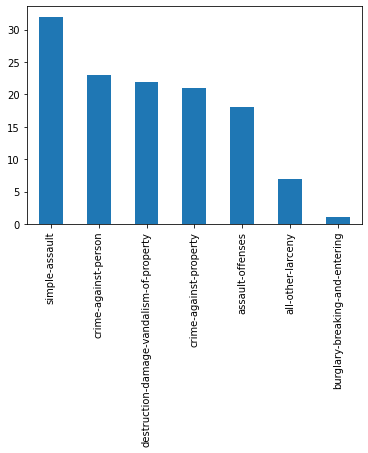

In [ ]:
Top5ineachYear['offense'].value_counts().plot(kind='bar')

**The Top Offenses are ['destruction-damage-vandalism-of-property',
 'crime-against-property',
 'burglary-breaking-and-entering',
 'all-other-larceny',
 'simple-assault',
 'crime-against-person',
 'assault-offenses']**

## **2. The average percentage of violent crimes relative to total crime per state over all available years:**

In [ ]:
Violent = FBI.groupby('state name',axis=0);
NotViolentDICT = dict()
i = 0;
h2 = 0;
for name_of_group, contents_of_group in Violent:
  h1 = 0;
  for i in range(len(contents_of_group)):
      if 'simple' in contents_of_group.iloc[i,2] : h1+=1
  NotViolentDICT[name_of_group] = h2 + h1;
  h2 = h1;

In [ ]:
Vio = FBI.groupby('state name',axis=0).count().loc[:,'offense']

In [ ]:
Vio

state name
AK     169
AL    2236
AR    3631
AZ    2589
CA     169
CO    4672
CT    3952
DC    2131
DE    3346
FL     113
GA    1256
HI     685
IA    4922
ID    4864
IL    3049
IN    1336
KS    3391
KY    3717
LA    2882
MA    4557
MD     939
ME    2762
MI    4675
MN    1557
MO    2464
MS    1958
MT    2786
NC     564
ND    4922
NE    3675
NH    3279
NJ     184
NM     685
NV     509
NY     448
OH    3955
OK    2325
OR    3132
PA    1239
RI    2871
SC    5340
SD    3498
TN    4417
TX    4315
UT    4672
VA    4831
VT    4255
WA    2700
WI    3017
WV    3896
WY     439
Name: offense, dtype: int64

In [ ]:
i = 0;
NotViolentDICT_ = dict()
for year in NotViolentDICT:
  NotViolentDICT_[year] = 100*NotViolentDICT[year]/Vio.iloc[i]
  i = i+1;

In [ ]:
NotViolentDICT_

{'AK': 0.591715976331361,
 'AL': 0.8497316636851521,
 'AR': 1.1016248967226658,
 'AZ': 1.544998068752414,
 'CA': 11.242603550295858,
 'CO': 0.6207191780821918,
 'CT': 1.3157894736842106,
 'DC': 2.1586109807602063,
 'DE': 1.2851165570830843,
 'FL': 19.469026548672566,
 'GA': 0.7961783439490446,
 'HI': 1.897810218978102,
 'IA': 0.6907761072734661,
 'ID': 1.2335526315789473,
 'IL': 1.9678583142013775,
 'IN': 2.9191616766467066,
 'KS': 0.9141846063108228,
 'KY': 1.2375571697605596,
 'LA': 1.4920194309507286,
 'MA': 1.0094360324775071,
 'MD': 3.5143769968051117,
 'ME': 0.8689355539464156,
 'MI': 0.9625668449197861,
 'MN': 2.7617212588310855,
 'MO': 1.2987012987012987,
 'MS': 1.481103166496425,
 'MT': 1.0768126346015794,
 'NC': 3.5460992907801416,
 'ND': 0.6907761072734661,
 'NE': 1.4965986394557824,
 'NH': 1.3418725221103995,
 'NJ': 11.41304347826087,
 'NM': 0.7299270072992701,
 'NV': 1.37524557956778,
 'NY': 1.3392857142857142,
 'OH': 0.6826801517067004,
 'OK': 1.6344086021505377,
 'OR': 1

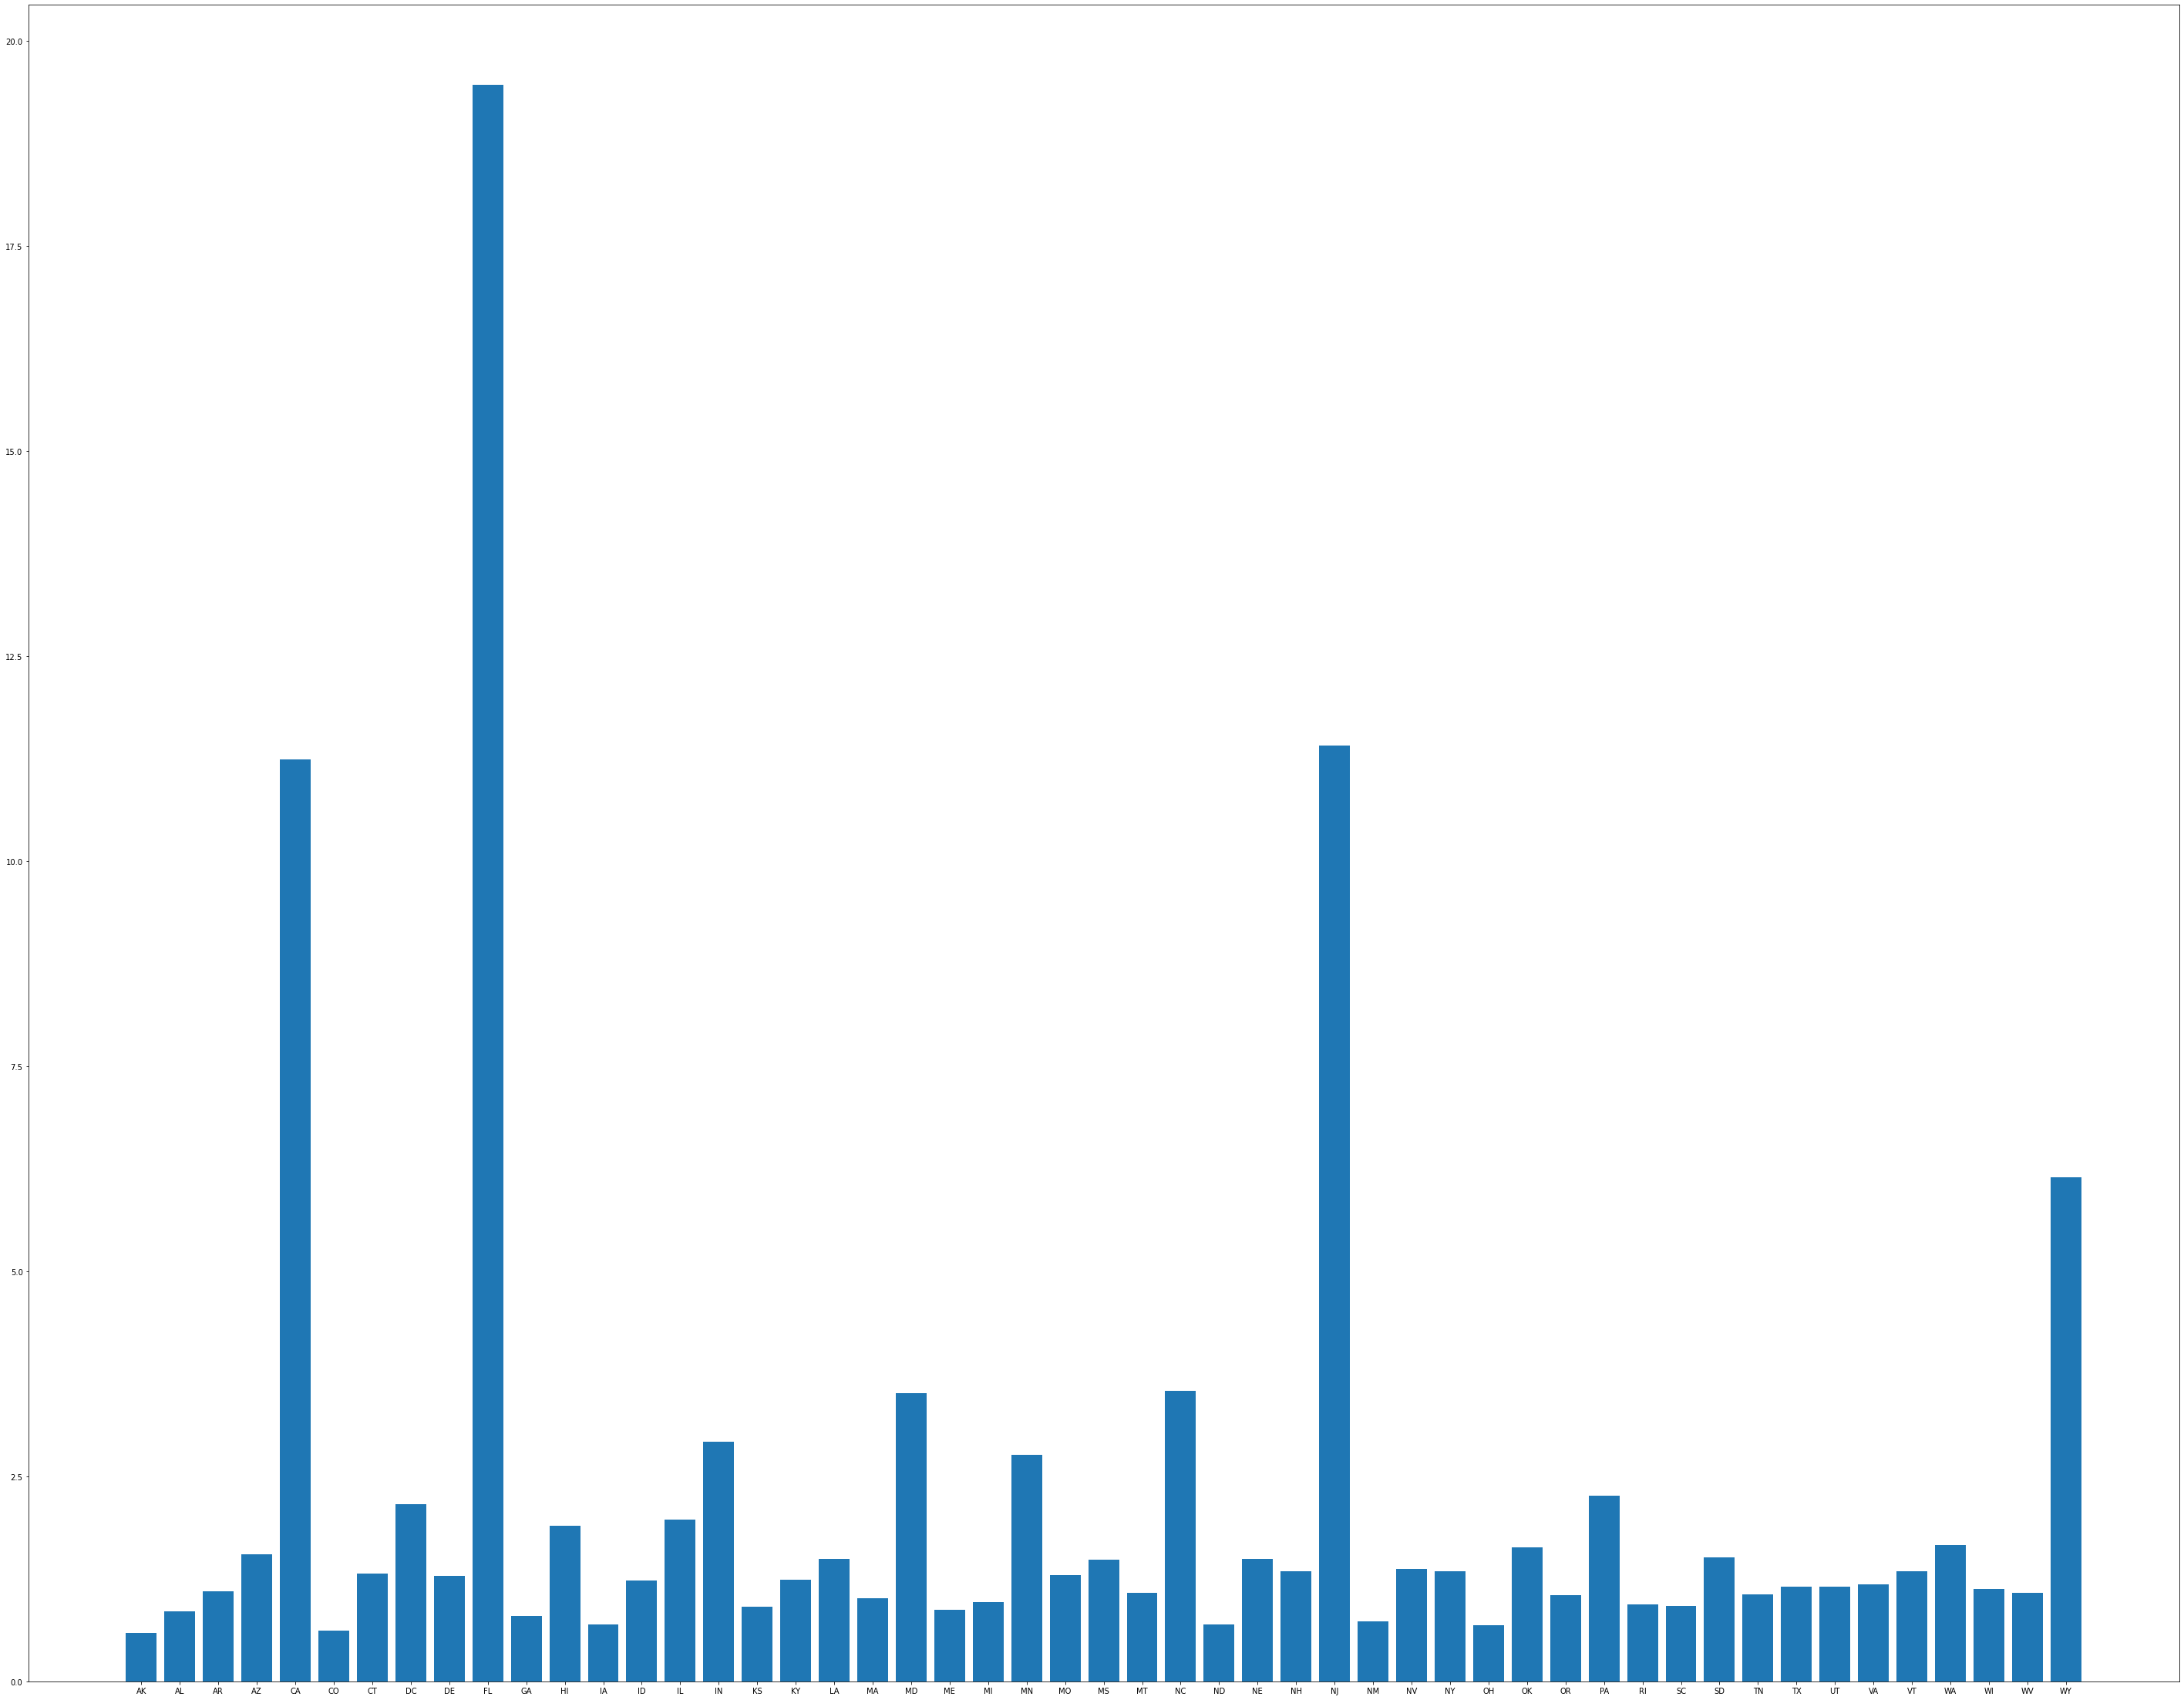

In [ ]:
import matplotlib.pyplot as plt

States = list(NotViolentDICT_.keys())
Rates = list(NotViolentDICT_.values())
f = plt.figure()
f.set_figwidth(50)
f.set_figheight(40)
plt.bar(range(len(NotViolentDICT_)), Rates, tick_label=States)
plt.show()

Assuming that the 'simple-assault' crime isn't violent, otherwise is violent.

## **3. National homicide rates, as well as total violent crime rates per year over all years.**

In [ ]:
homi = FBI.groupby('year',axis=0);

In [ ]:
homiDICT = dict()
i = 0;
h2 = 0;
for name_of_group, contents_of_group in homi:
  h1 = 0;
  for i in range(len(contents_of_group)):
      #print(name_of_group)
      if 'homi' in contents_of_group.iloc[i,2] : h1+=1
     # print(contents_of_group)
  homiDICT[name_of_group] = h2 + h1;
  h2 = h1;

In [ ]:
homiDICT

{1991: 9,
 1992: 27,
 1993: 35,
 1994: 39,
 1995: 49,
 1996: 52,
 1997: 65,
 1998: 84,
 1999: 95,
 2000: 112,
 2001: 122,
 2002: 119,
 2003: 123,
 2004: 135,
 2005: 157,
 2006: 177,
 2007: 181,
 2008: 180,
 2009: 189,
 2010: 202,
 2011: 203,
 2012: 212,
 2013: 214,
 2014: 220,
 2015: 230,
 2016: 227,
 2017: 235,
 2018: 252,
 2019: 289,
 2020: 315,
 2021: 338}

In [ ]:
homi.size()

year
1991     522
1992     954
1993    1156
1994    1410
1995    1441
1996    1445
1997    1918
1998    2649
1999    2738
2000    3274
2001    3397
2002    3605
2003    3880
2004    4498
2005    4882
2006    5296
2007    5334
2008    5499
2009    5523
2010    5591
2011    5615
2012    5705
2013    5893
2014    6098
2015    6126
2016    6467
2017    6615
2018    7213
2019    8029
2020    8147
2021    9056
dtype: int64

In [ ]:
i = 0;
homiDICT_ = dict()
for year in homiDICT:
  homiDICT_[year] = 100*homiDICT[year]/homi.size().iloc[i]
  i = i+1;

In [ ]:
homiDICT_

{1991: 1.7241379310344827,
 1992: 2.830188679245283,
 1993: 3.027681660899654,
 1994: 2.765957446808511,
 1995: 3.400416377515614,
 1996: 3.5986159169550174,
 1997: 3.388946819603754,
 1998: 3.1710079275198186,
 1999: 3.4696859021183344,
 2000: 3.420891875381796,
 2001: 3.591404180158964,
 2002: 3.3009708737864076,
 2003: 3.170103092783505,
 2004: 3.0013339261894174,
 2005: 3.2158951249487915,
 2006: 3.34214501510574,
 2007: 3.393325834270716,
 2008: 3.2733224222585924,
 2009: 3.4220532319391634,
 2010: 3.6129493829368626,
 2011: 3.615316117542297,
 2012: 3.7160385626643295,
 2013: 3.6314271169183776,
 2014: 3.6077402427025254,
 2015: 3.7544890630101206,
 2016: 3.5101283438997988,
 2017: 3.5525321239606953,
 2018: 3.4936919450991266,
 2019: 3.5994519865487606,
 2020: 3.8664539094145085,
 2021: 3.7323321554770317}

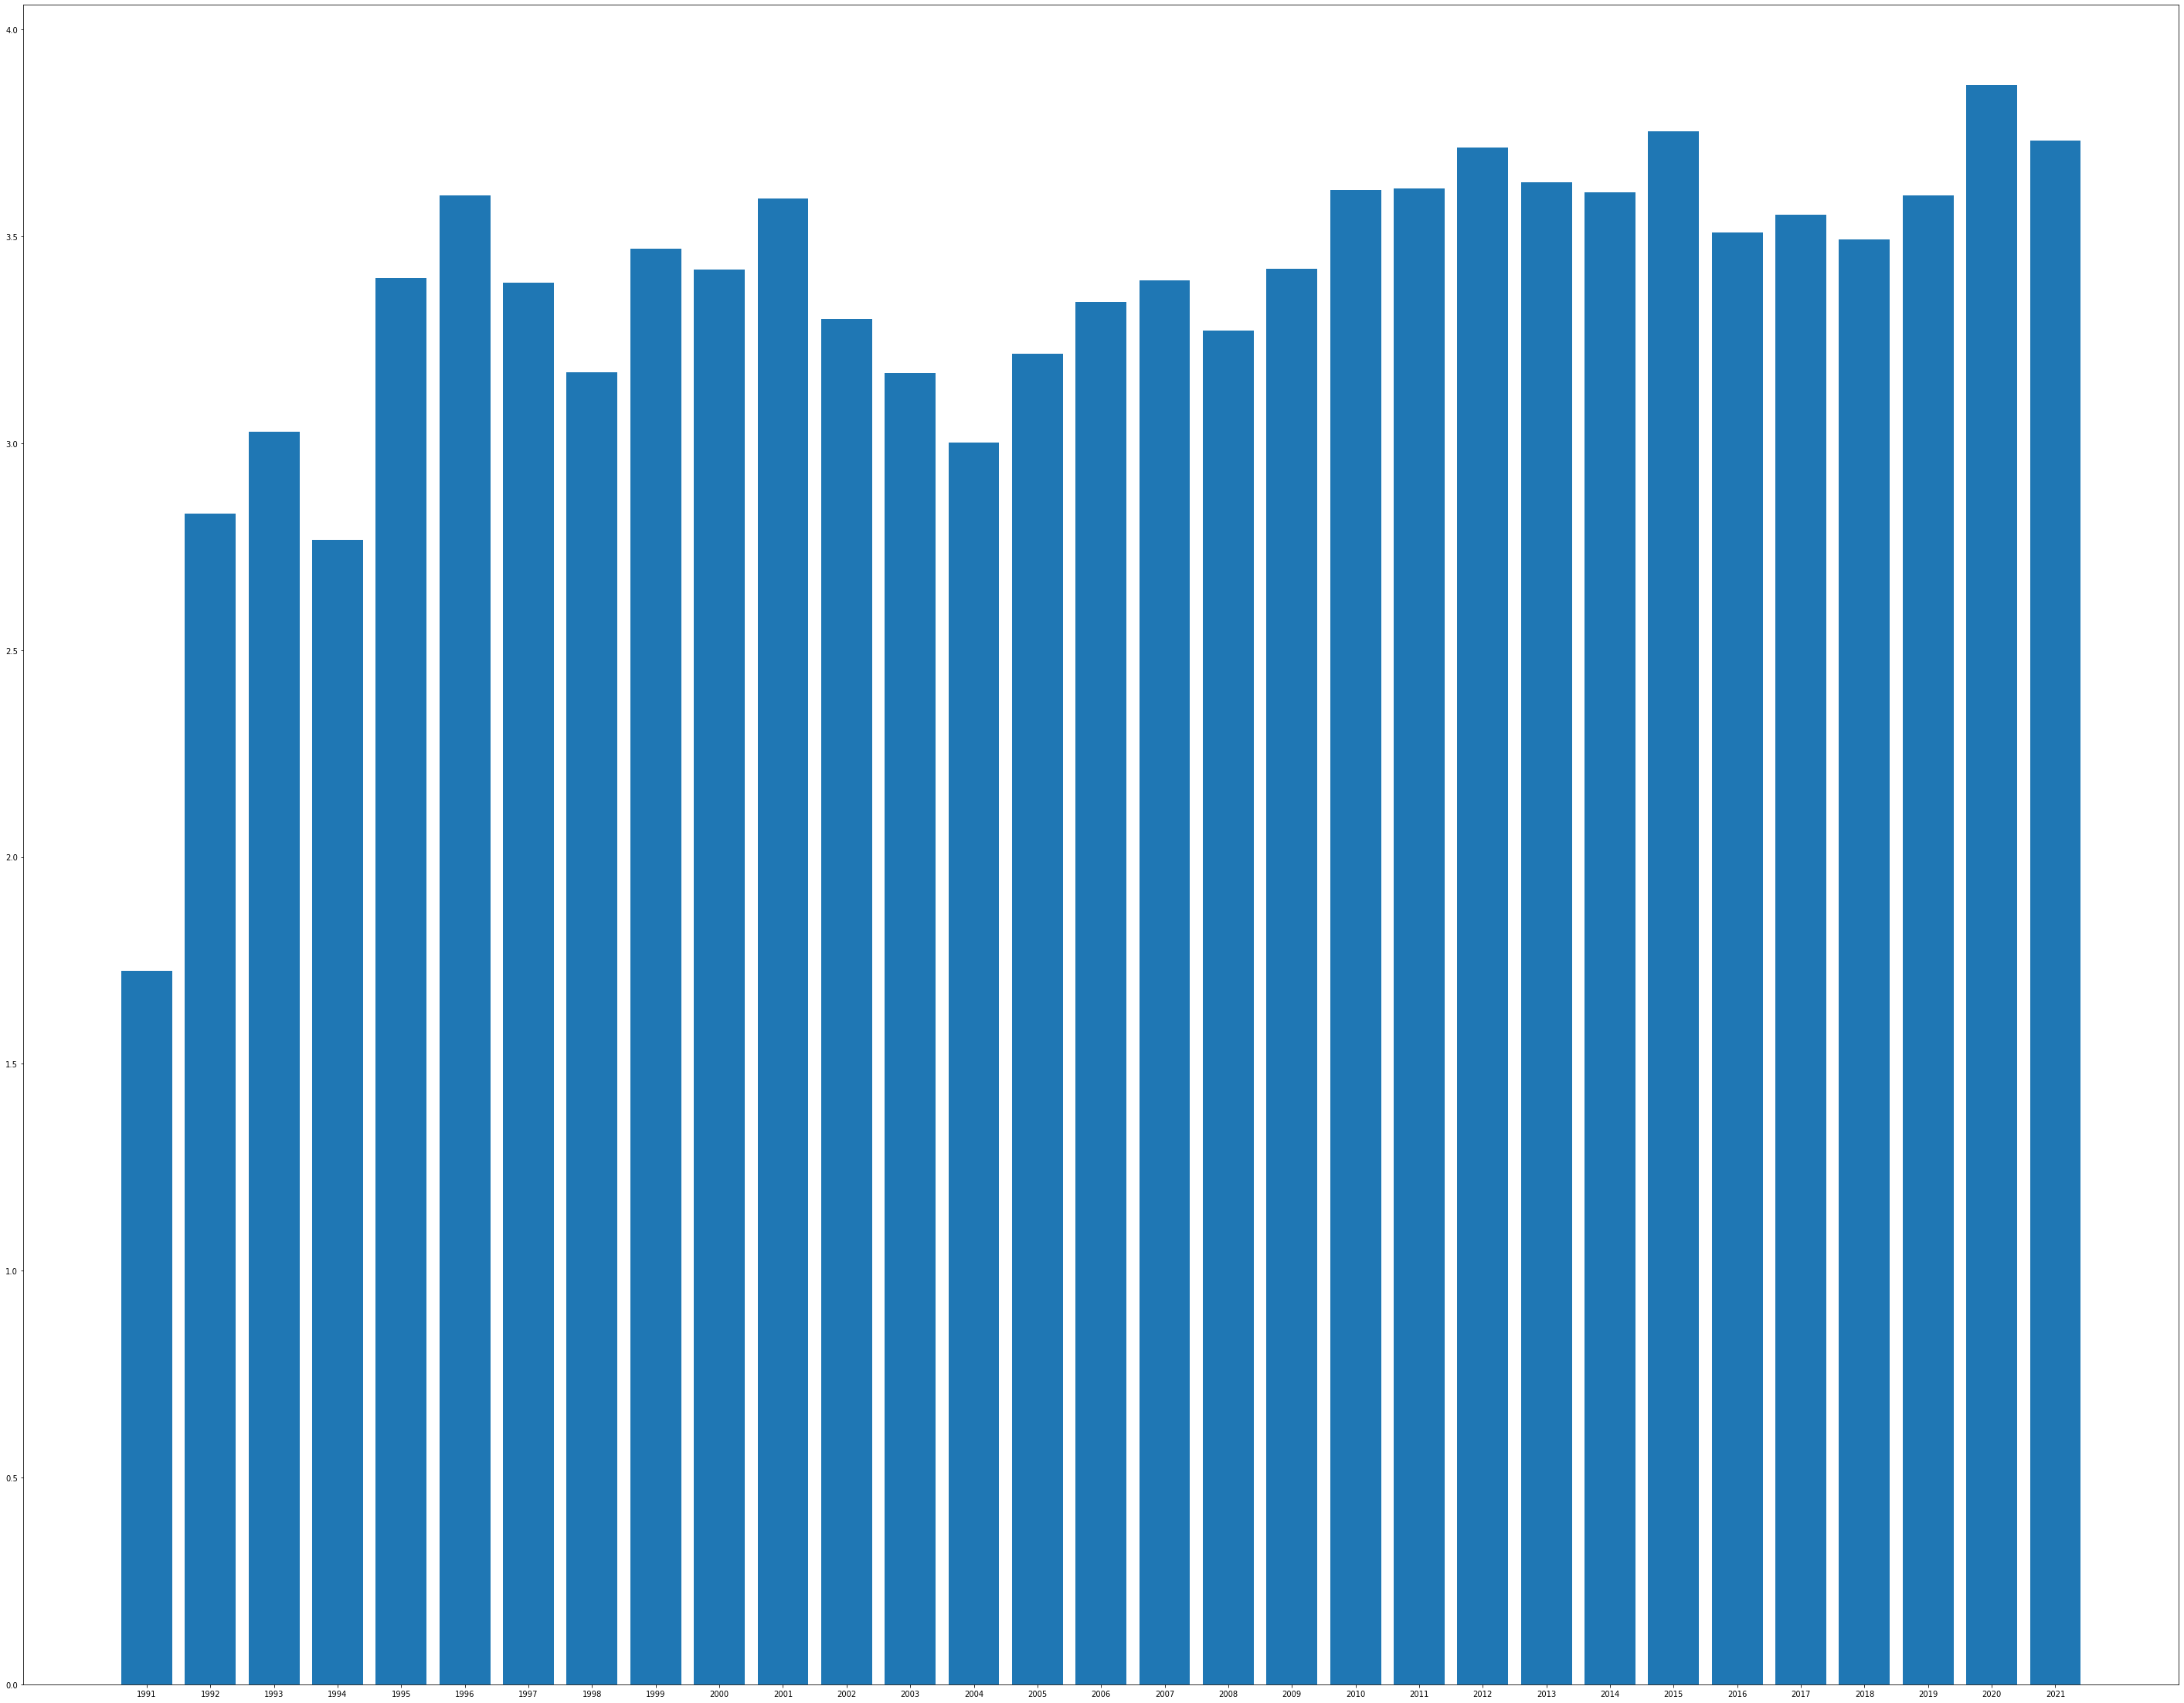

In [ ]:
import matplotlib.pyplot as plt

Years = list(homiDICT_.keys())
Rates = list(homiDICT_.values())
f = plt.figure()
f.set_figwidth(50)
f.set_figheight(40)
plt.bar(range(len(homiDICT_)), Rates, tick_label=Years)
plt.show()

**Basic demographic information are age, race,  gender.**

## **4. The frequency of non-fatal crime incidents in relation to victim demographics:**

In [ ]:
#Age
Frequnce_Age = Personal_Victimization['ager'].value_counts()

print ("The Freaquncy for age 12 - 17 :", Frequnce_Age.iloc[3], "Per",Frequnce_Age.sum(), "Samples." );
print ("The Freaquncy for age 18 - 24 :", Frequnce_Age.iloc[2], "Per",Frequnce_Age.sum(), "Samples." );
print ("The Freaquncy for age 25 - 34 :", Frequnce_Age.iloc[1], "Per",Frequnce_Age.sum(), "Samples." );
print ("The Freaquncy for age 35 - 49 :", Frequnce_Age.iloc[0], "Per",Frequnce_Age.sum(), "Samples." );
print ("The Freaquncy for age 50 - 64 :", Frequnce_Age.iloc[4], "Per",Frequnce_Age.sum(), "Samples." );
print ("The Freaquncy for age older than 65 :", Frequnce_Age.iloc[5], "Per",Frequnce_Age.sum(), "Samples." );
#Sex
Frequnce_Sex = Personal_Victimization['sex'].value_counts()

print ("The Freaquncy of Males :", Frequnce_Sex.iloc[0], "Per",Frequnce_Sex.sum(), "Samples." );
print ("The Freaquncy of FeMales :", Frequnce_Sex.iloc[1], "Per",Frequnce_Sex.sum(), "Samples." );

#Race
Frequnce_Race = Personal_Victimization['race_ethnicity'].value_counts()

print ("The Freaquncy of Non-Hispanic/White :", Frequnce_Race.iloc[0], "Per",Frequnce_Race.sum(), "Samples." );
print ("The Freaquncy of Non-Hispanic/Black :", Frequnce_Race.iloc[2], "Per",Frequnce_Race.sum(), "Samples." );
print ("The Freaquncy of Non-Hispanic/American Indian/Alaska Native :", Frequnce_Race.iloc[5], "Per",Frequnce_Race.sum(), "Samples." );
print ("The Freaquncy of Non-Hispanic/ Asian/ Native Hawaiian/ Other Pacific Islander :", Frequnce_Race.iloc[3], "Per",Frequnce_Race.sum(), "Samples." );
print ("The Freaquncy of Non-Hispanic more than one race :", Frequnce_Race.iloc[4], "Per",Frequnce_Race.sum(), "Samples." );
print ("The Freaquncy of Hispanic :", Frequnce_Race.iloc[1], "Per",Frequnce_Race.sum(), "Samples." );


The Freaquncy for age 12 - 17 : 11738 Per 63465 Samples.
The Freaquncy for age 18 - 24 : 11793 Per 63465 Samples.
The Freaquncy for age 25 - 34 : 13522 Per 63465 Samples.
The Freaquncy for age 35 - 49 : 15743 Per 63465 Samples.
The Freaquncy for age 50 - 64 : 8199 Per 63465 Samples.
The Freaquncy for age older than 65 : 2470 Per 63465 Samples.
The Freaquncy of Males : 32801 Per 63465 Samples.
The Freaquncy of FeMales : 30664 Per 63465 Samples.
The Freaquncy of Non-Hispanic/White : 44434 Per 63465 Samples.
The Freaquncy of Non-Hispanic/Black : 7899 Per 63465 Samples.
The Freaquncy of Non-Hispanic/American Indian/Alaska Native : 712 Per 63465 Samples.
The Freaquncy of Non-Hispanic/ Asian/ Native Hawaiian/ Other Pacific Islander : 1387 Per 63465 Samples.
The Freaquncy of Non-Hispanic more than one race : 1024 Per 63465 Samples.
The Freaquncy of Hispanic : 8009 Per 63465 Samples.


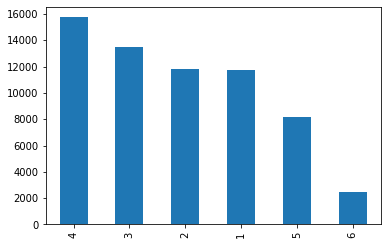

In [ ]:
Frequnce_Age.plot(kind='bar')

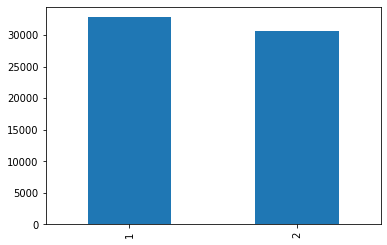

In [ ]:
Frequnce_Sex.plot(kind='bar')

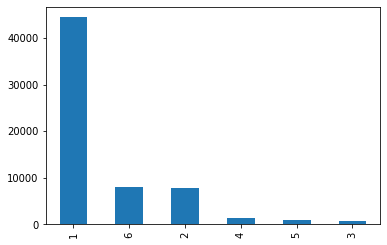

In [ ]:
Frequnce_Race.plot(kind='bar')

## **5. The frequency of non-fatal crime incidents in relation to offender demographics.**


In [ ]:
#Age
OffenderFrequnce_Age = Personal_Victimization['offenderage'].value_counts()

print ("The Freaquncy for age 11 or younger :", OffenderFrequnce_Age.iloc[5], "Per",OffenderFrequnce_Age.sum(), "Samples." );
print ("The Freaquncy for age 12-17 :", OffenderFrequnce_Age.iloc[2], "Per",OffenderFrequnce_Age.sum(), "Samples." );
print ("The Freaquncy for age 18 - 29 :", OffenderFrequnce_Age.iloc[1], "Per",OffenderFrequnce_Age.sum(), "Samples." );
print ("The Freaquncy for age 30 or older :", OffenderFrequnce_Age.iloc[0], "Per",OffenderFrequnce_Age.sum(), "Samples." );
print ("The Freaquncy for age Multiple offenders of various ages :", OffenderFrequnce_Age.iloc[4], "Per",OffenderFrequnce_Age.sum(), "Samples." );
print ("The Freaquncy for Residue :", OffenderFrequnce_Age.iloc[3], "Per",OffenderFrequnce_Age.sum(), "Samples." );
#Sex
OffenderFrequnce_Sex = Personal_Victimization['offendersex'].value_counts()

print ("The Freaquncy of Males :", OffenderFrequnce_Sex.iloc[0], "Per",OffenderFrequnce_Sex.sum(), "Samples." );
print ("The Freaquncy of FeMales :", OffenderFrequnce_Sex.iloc[1], "Per",OffenderFrequnce_Sex.sum(), "Samples." );
print ("The Freaquncy of Both Males and Females :", OffenderFrequnce_Sex.iloc[3], "Per",OffenderFrequnce_Sex.sum(), "Samples." );
print ("The Freaquncy of Unknown :", OffenderFrequnce_Sex.iloc[2], "Per",OffenderFrequnce_Sex.sum(), "Samples." );
print ("The Freaquncy of Residue :", OffenderFrequnce_Sex.iloc[4], "Per",OffenderFrequnce_Sex.sum(), "Samples." );



#Race
OffenderFrequnce_Race = Personal_Victimization['offtracenew'].value_counts()

print ("The Freaquncy of the Invalid until 2012 Q1 :", OffenderFrequnce_Race.iloc[0], "Per",OffenderFrequnce_Race.sum(), "Samples." );
print ("The Freaquncy of Non-Hispanic/White :", OffenderFrequnce_Race.iloc[1], "Per",OffenderFrequnce_Race.sum(), "Samples." );
print ("The Freaquncy of Non-Hispanic/Black :", OffenderFrequnce_Race.iloc[2], "Per",OffenderFrequnce_Race.sum(), "Samples." );
print ("The Freaquncy of Non-Hispanic/American Indian/Alaska Native :", OffenderFrequnce_Race.iloc[9], "Per",OffenderFrequnce_Race.sum(), "Samples." );
print ("The Freaquncy of Non-Hispanic/ Asian/ Native Hawaiian/ Other Pacific Islander :", OffenderFrequnce_Race.iloc[6], "Per",OffenderFrequnce_Race.sum(), "Samples." );
print ("The Freaquncy of Non-Hispanic more than one race :", OffenderFrequnce_Race.iloc[7], "Per",OffenderFrequnce_Race.sum(), "Samples." );
print ("The Freaquncy of Hispanic :", OffenderFrequnce_Race.iloc[3], "Per",OffenderFrequnce_Race.sum(), "Samples." );
print ("The Freaquncy of Unknown race/ethnicity :", OffenderFrequnce_Race.iloc[4], "Per",OffenderFrequnce_Race.sum(), "Samples." );
print ("The Freaquncy of Mixed race group of offenders :", OffenderFrequnce_Race.iloc[8], "Per",OffenderFrequnce_Race.sum(), "Samples." );
print ("The Freaquncy of Unknown number of offenders :", OffenderFrequnce_Race.iloc[5], "Per",OffenderFrequnce_Race.sum(), "Samples." );


The Freaquncy for age 11 or younger : 875 Per 63465 Samples.
The Freaquncy for age 12-17 : 9966 Per 63465 Samples.
The Freaquncy for age 18 - 29 : 18341 Per 63465 Samples.
The Freaquncy for age 30 or older : 22622 Per 63465 Samples.
The Freaquncy for age Multiple offenders of various ages : 4769 Per 63465 Samples.
The Freaquncy for Residue : 6892 Per 63465 Samples.
The Freaquncy of Males : 47183 Per 63465 Samples.
The Freaquncy of FeMales : 10299 Per 63465 Samples.
The Freaquncy of Both Males and Females : 2236 Per 63465 Samples.
The Freaquncy of Unknown : 2762 Per 63465 Samples.
The Freaquncy of Residue : 985 Per 63465 Samples.
The Freaquncy of the Invalid until 2012 Q1 : 45151 Per 63465 Samples.
The Freaquncy of Non-Hispanic/White : 8413 Per 63465 Samples.
The Freaquncy of Non-Hispanic/Black : 4094 Per 63465 Samples.
The Freaquncy of Non-Hispanic/American Indian/Alaska Native : 151 Per 63465 Samples.
The Freaquncy of Non-Hispanic/ Asian/ Native Hawaiian/ Other Pacific Islander : 280 

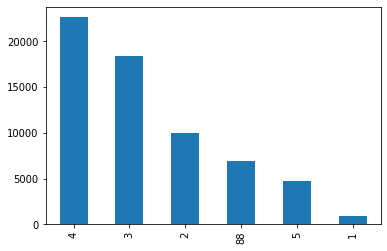

In [ ]:
OffenderFrequnce_Age.plot(kind='bar')

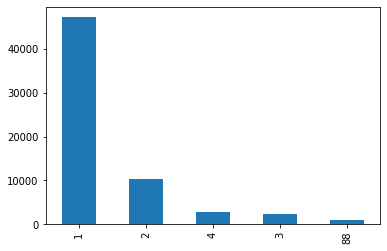

In [ ]:
OffenderFrequnce_Sex.plot(kind='bar')

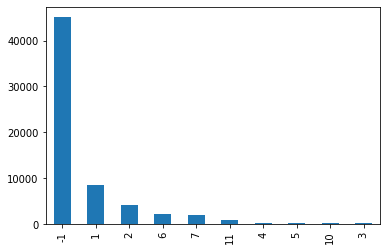

In [ ]:
OffenderFrequnce_Race.plot(kind='bar')

## **6. The relationship between the victim’s education level, their gross household income, and their rate of victimization.**

In [ ]:
edu = Personal_Victimization['educatn1']
gross_household = Personal_Victimization['hincome1']

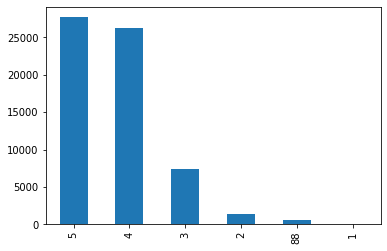

In [ ]:
edu.value_counts().plot(kind='bar')

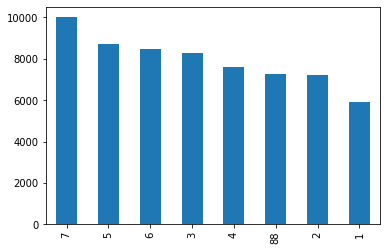

In [ ]:
gross_household.value_counts().plot(kind='bar')

# **PART 3: Answering Questions:**

## **3.1 Use the appropriate statistics and plots to answer the following questions:**

Which type of non-fatal crime is the most under-reported?

most under reported:   rape
least under reported:   Aggravated_assault


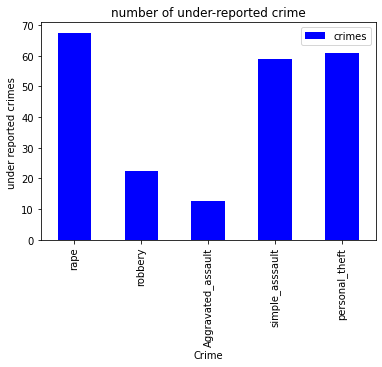

In [ ]:
Personal_Victimization.columns
#reported->Reporting_to_police
#crime->type_of_crime:
#1->rape/sexual asssult
#2->robbery
#3->Aggravated assault
#4->simple assault
#5->Personal theft
Personal_Victimization['type_of_crime']
Personal_Victimization['Reporting_to_police']
# create a copy of the original data
Personal_Victimization_copy = Personal_Victimization.copy()
cols = ['type_of_crime', 'Reporting_to_police']
Personal_Victimization_copy[cols]
count_rape=0
count_robbery=0
count_Aggravated_assault=0
count_simple_asssault=0
count_personal_theft=0
for i in range(len(Personal_Victimization_copy)):
    if Personal_Victimization_copy['type_of_crime'][i] ==1 :
        if Personal_Victimization_copy['Reporting_to_police'][i] ==2:
           count_rape=count_rape+1
    else:
      if Personal_Victimization_copy['type_of_crime'][i] ==2 :
         if Personal_Victimization_copy['Reporting_to_police'][i]==2 :
            count_robbery=count_robbery+1
      else:
          if Personal_Victimization_copy['type_of_crime'][i] ==3:
              if Personal_Victimization_copy['Reporting_to_police'][i]==2 :
                 count_Aggravated_assault=count_Aggravated_assault+1
          else:
                if Personal_Victimization_copy['type_of_crime'][i] ==4 :
                   if Personal_Victimization_copy['Reporting_to_police'][i]==2 :
                       count_simple_asssault=count_simple_asssault+1
                else:
                     if Personal_Victimization_copy['type_of_crime'][i] ==5 :
                        if Personal_Victimization_copy['Reporting_to_police'][i]==2 :
                            count_personal_theft=count_personal_theft+1

   ##################################3
total_count_rape=0
total_count_robbery=0
total_count_Aggravated_assault=0
total_count_simple_asssault=0
total_count_personal_theft=0
for i in range(len(Personal_Victimization_copy)):
    if Personal_Victimization_copy['type_of_crime'][i] ==1 :
        if (Personal_Victimization_copy['Reporting_to_police'][i] ==2) | (Personal_Victimization_copy['Reporting_to_police'][i] ==1):
           total_count_rape=total_count_rape+1
    else:
      if Personal_Victimization_copy['type_of_crime'][i] ==2 :
         if(Personal_Victimization_copy['Reporting_to_police'][i] ==2) | (Personal_Victimization_copy['Reporting_to_police'][i] ==1) :
            total_count_robbery=total_count_robbery+1
      else:
          if Personal_Victimization_copy['type_of_crime'][i] ==3:
              if (Personal_Victimization_copy['Reporting_to_police'][i] ==2) | (Personal_Victimization_copy['Reporting_to_police'][i] ==1):
                 total_count_Aggravated_assault=total_count_Aggravated_assault+1
          else:
                if Personal_Victimization_copy['type_of_crime'][i] ==4 :
                   if(Personal_Victimization_copy['Reporting_to_police'][i] ==2) | (Personal_Victimization_copy['Reporting_to_police'][i] ==1):
                       total_count_simple_asssault=total_count_simple_asssault+1
                else:
                     if Personal_Victimization_copy['type_of_crime'][i] ==5 :
                        if (Personal_Victimization_copy['Reporting_to_police'][i] ==2) | (Personal_Victimization_copy['Reporting_to_police'][i] ==1):
                            total_count_personal_theft=total_count_personal_theft+1
   ##################################

dictionary_1={"rape":(count_rape/total_count_rape)*100,"robbery":(count_robbery/total_count_Aggravated_assault)*100,"Aggravated_assault":(count_Aggravated_assault/total_count_simple_asssault)*100,"simple_asssault":(count_simple_asssault/total_count_simple_asssault)*100,"personal_theft":(count_personal_theft/total_count_personal_theft)*100}
print("most under reported:  ",max(dictionary_1, key=dictionary_1.get))
print("least under reported:  ",min(dictionary_1, key=dictionary_1.get))

Personal_Victimization_copy['type_of_crime'] = Personal_Victimization_copy['type_of_crime'] .replace({1:"sexual_asssult",2:"robbery",3:"Aggravated_assault",4:"simple_assault",5:"Personal_theft"})
#plt.hist(Personal_Victimization_copy['type_of_crime'],counts)
#plt.xlabel('type of crime')
#plt.ylabel('number of reports')
df = pd.DataFrame(list(dictionary_1.items()),columns = ['keys','crimes'])
df.plot(kind ='bar',x ='keys',y ='crimes',color ='blue')
plt.xlabel("Crime")
plt.ylabel("under reported crimes ")
plt.title("number of under-reported crime")
plt.show()

#########################################################################################################################################################################################


 Is there an association between the offender-victim relationship and the likelihood of a
crime being reported?

relation of most reported :   Intimates


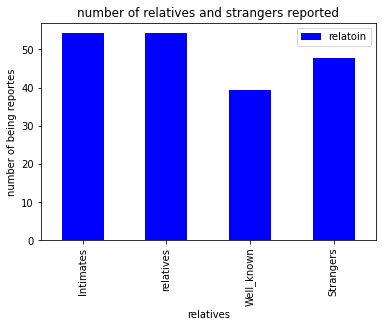

relation of most reported :   Strangers


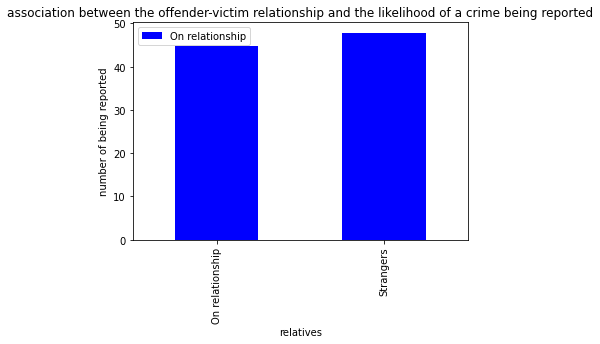

relation of most reported :   Strangers


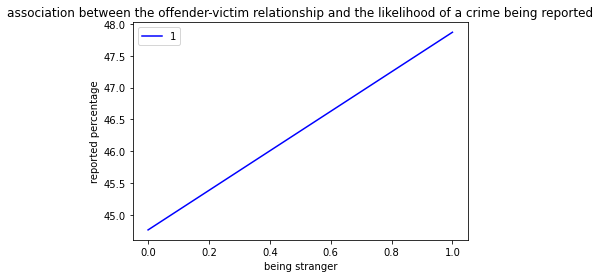

In [ ]:
Personal_Victimization_copy['Victim-offender_relationship']
cols = ['Victim-offender_relationship', 'Reporting_to_police']
total_Intimates=0
total_relatives=0
total_Well_known=0

total_Strangers=0

Personal_Victimization_copy[cols]

for i in range(len(Personal_Victimization_copy)):
    if Personal_Victimization_copy['Victim-offender_relationship'][i] ==1 :
        if (Personal_Victimization_copy['Reporting_to_police'][i] ==2) | (Personal_Victimization_copy['Reporting_to_police'][i] ==1):
           total_Intimates=total_Intimates+1
    else:
        if Personal_Victimization_copy['Victim-offender_relationship'][i] ==2 :
           if (Personal_Victimization_copy['Reporting_to_police'][i] ==2) | (Personal_Victimization_copy['Reporting_to_police'][i] ==1):
              total_relatives=total_relatives+1
        else:
            if Personal_Victimization_copy['Victim-offender_relationship'][i] ==3 :
                if (Personal_Victimization_copy['Reporting_to_police'][i] ==2) | (Personal_Victimization_copy['Reporting_to_police'][i] ==1):
                    total_Well_known=total_Well_known+1
            else:
                if Personal_Victimization_copy['Victim-offender_relationship'][i] ==4 :
                    if (Personal_Victimization_copy['Reporting_to_police'][i] ==2) | (Personal_Victimization_copy['Reporting_to_police'][i] ==1):
                         total_Strangers=total_Strangers+1
#################################
Intimates=0
relatives=0
Well_known=0

Strangers=0

Personal_Victimization_copy[cols]

for i in range(len(Personal_Victimization_copy)):
    if Personal_Victimization_copy['Victim-offender_relationship'][i] ==1 :
        if Personal_Victimization_copy['Reporting_to_police'][i] ==1:
           Intimates=Intimates+1
    else:
        if Personal_Victimization_copy['Victim-offender_relationship'][i] ==2 :
           if Personal_Victimization_copy['Reporting_to_police'][i] ==1:
              relatives=relatives+1
        else:
            if Personal_Victimization_copy['Victim-offender_relationship'][i] ==3 :
                if Personal_Victimization_copy['Reporting_to_police'][i]==1:
                    Well_known=Well_known+1
            else:
                if Personal_Victimization_copy['Victim-offender_relationship'][i] ==4 :
                    if Personal_Victimization_copy['Reporting_to_police'][i]==1 :
                         Strangers=Strangers+1
#################################

dictionary={"Intimates":(Intimates/total_Intimates)*100,"relatives":(relatives/total_relatives)*100,"Well_known":(Well_known/total_Well_known)*100,"Strangers":(Strangers/total_Strangers)*100}
print("relation of most reported :  ",max(dictionary, key=dictionary.get))

import seaborn as sns
df = pd.DataFrame(list(dictionary.items()),columns = ['keys','relatoin'])
df.plot(kind ='bar',x ='keys',y ='relatoin',color ='blue')
plt.xlabel("relatives")
plt.ylabel("number of being reportes")
plt.title("number of relatives and strangers reported")
plt.show()
###########################################################################################################################################################3
dictionary_2={"On relationship":((Intimates+relatives+Well_known)/(total_Intimates+total_relatives+total_Well_known))*100,"Strangers":(Strangers/total_Strangers)*100}

print("relation of most reported :  ",max(dictionary_2, key=dictionary_2.get))


import seaborn as sns
df = pd.DataFrame(list(dictionary_2.items()),columns = ['keys','On relationship'])
df.plot(kind ='bar',x ='keys',y ='On relationship',color ='blue')
plt.xlabel("relatives")
plt.ylabel("number of being reported")
plt.title("association between the offender-victim relationship and the likelihood of a crime being reported")
plt.show()

print("relation of most reported :  ",max(dictionary_2, key=dictionary_2.get))

import seaborn as sns
df = pd.DataFrame(list(dictionary_2.items()))
df.plot(kind ='line',color ='blue')
plt.xlabel("being stranger")
plt.ylabel("reported percentage")
plt.title("association between the offender-victim relationship and the likelihood of a crime being reported")
plt.show()

Who are the people (the demographic segment) that appear to be most at
risk of violent victimization? Who is the least at risk?

In [ ]:
Personal_Victimization_copy.columns

Index(['Unique_Person_Identifier', 'Year_QuarterCollected', 'year', 'ager',
       'sex', 'hispanic', 'race', 'Race_HispanicOrigin',
       'AnnualIncome_Household_Starting2015Q1',
       'ImputedIncomeCategories_Starting2017Q1', 'marital', 'Population_size',
       'region', 'Location_of_residence',
       'Location_of_Household_BJS_Starting2020Q1', 'Education_level',
       'Education_level_Starting_from_2003Q1',
       'Veteran_Status_Starting_from_2017',
       'Citizenship_Status_Starting_from_2017Q1', 'Aggregate_Type_of_crime',
       'type_of_crime', 'seriousviolent', 'Reporting_to_police',
       'victims_recieved_help', 'crime_location',
       'Victim-offender_relationship', 'weapon', 'Weapon_category', 'injury',
       'injury_type', 'treatment', 'offenderage', 'offendersex', 'offtracenew',
       'Annual_victimization_weight', 'series',
       'Series adjusted_victimization_weight'],
      dtype='object')

31959 29455
31959 29455 30664
most at risk of violent victimization are  age_12_17 males Non_Hispanic_American_Indian
least risk of violent victimization are  age_65older females Non_Hispanic_Asian


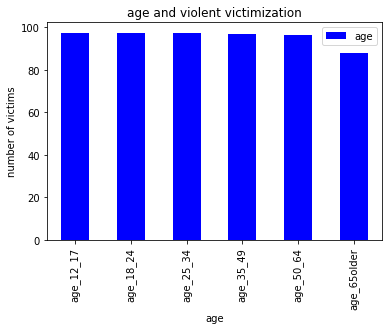

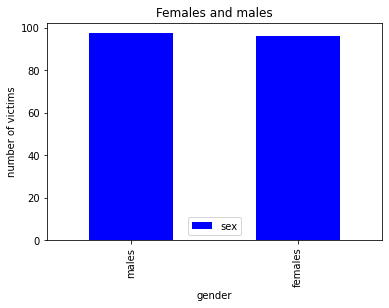

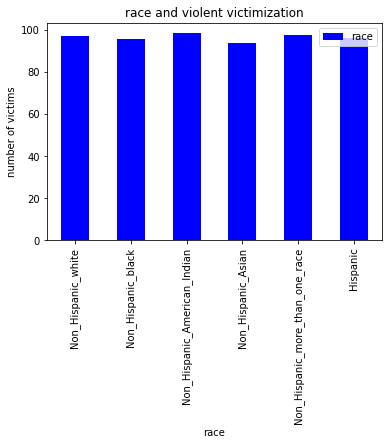

In [ ]:
#violent -> newcrime 1
#demographic -> sex ager offtrace
#sex
males=0
females=0

#age
age_12_17=0
age_18_24=0
age_25_34=0
age_35_49=0
age_50_64=0
age_65older=0

#race
Non_Hispanic_white=0
Non_Hispanic_black =0
Non_Hispanic_American_Indian=0
Non_Hispanic_Asian=0
Non_Hispanic_more_than_one_race=0
Hispanic=0

for i in range(len(Personal_Victimization)):
  if Personal_Victimization_copy['Aggregate_Type_of_crime'][i]==1:
    if Personal_Victimization_copy['ager'][i]==1:
      age_12_17=age_12_17+1
    else:
        if Personal_Victimization_copy['ager'][i]==2:
           age_18_24=age_18_24+1
        else:
           if Personal_Victimization_copy['ager'][i]==3:
              age_25_34=age_25_34+1
           else:
               if Personal_Victimization_copy['ager'][i]==4:
                  age_35_49=age_35_49+1
               else:
                   if Personal_Victimization_copy['ager'][i]==5:
                      age_50_64=age_50_64+1
                   else:
                      if Personal_Victimization_copy['ager'][i]==6:
                          age_65older=age_65older+1

#############################3
#age
total_age_12_17=0
total_age_18_24=0
total_age_25_34=0
total_age_35_49=0
total_age_50_64=0
total_age_65older=0

for i in range(len(Personal_Victimization)):
  if (Personal_Victimization_copy['Aggregate_Type_of_crime'][i]==1) |((Personal_Victimization_copy['Aggregate_Type_of_crime'][i]==2)):
    if Personal_Victimization_copy['ager'][i]==1:
      total_age_12_17=total_age_12_17+1
    else:
        if Personal_Victimization_copy['ager'][i]==2:
           total_age_18_24=total_age_18_24+1
        else:
           if Personal_Victimization_copy['ager'][i]==3:
              total_age_25_34=total_age_25_34+1
           else:
               if Personal_Victimization_copy['ager'][i]==4:
                  total_age_35_49=total_age_35_49+1
               else:
                   if Personal_Victimization_copy['ager'][i]==5:
                      total_age_50_64=total_age_50_64+1
                   else:
                      if Personal_Victimization_copy['ager'][i]==6:
                          total_age_65older=total_age_65older+1

##############################

dictionary_age={"age_12_17":(age_12_17/total_age_12_17)*100,"age_18_24":(age_18_24/total_age_18_24)*100,"age_25_34":(age_25_34/total_age_25_34)*100,"age_35_49":(age_35_49/total_age_35_49)*100,"age_50_64":(age_50_64/total_age_50_64)*100,"age_65older":(age_65older/total_age_65older)*100}


for i in range(len(Personal_Victimization)):
  if Personal_Victimization_copy['Aggregate_Type_of_crime'][i]==1:
    if Personal_Victimization_copy['sex'][i]==1:
      males=males+1
    else:
        if Personal_Victimization_copy['sex'][i]==2:
           females=females+1
print(males,females)
###############################33
total_males=0
total_females=0

for i in range(len(Personal_Victimization)):
  if (Personal_Victimization_copy['Aggregate_Type_of_crime'][i]==1) |((Personal_Victimization_copy['Aggregate_Type_of_crime'][i]==2)):
    if Personal_Victimization_copy['sex'][i]==1:
      total_males=total_males+1
    else:
        if Personal_Victimization_copy['sex'][i]==2:
           total_females=total_females+1
print(males,females,total_females)
##################################3
dictionary_sex={"males":(males/total_males)*100,"females":(females/total_females)*100}

for i in range(len(Personal_Victimization)):
  if Personal_Victimization_copy['Aggregate_Type_of_crime'][i]==1:
        if Personal_Victimization_copy['Race_HispanicOrigin'][i]==1:
           Non_Hispanic_white=Non_Hispanic_white+1
        else:
           if Personal_Victimization_copy['Race_HispanicOrigin'][i]==2:
              Non_Hispanic_black=Non_Hispanic_black+1
           else:
               if Personal_Victimization_copy['Race_HispanicOrigin'][i]==3:
                  Non_Hispanic_American_Indian=Non_Hispanic_American_Indian+1
               else:
                   if Personal_Victimization_copy['Race_HispanicOrigin'][i]==4:
                      Non_Hispanic_Asian=Non_Hispanic_Asian+1
                   else:
                      if Personal_Victimization_copy['Race_HispanicOrigin'][i]==5:
                          Non_Hispanic_more_than_one_race=Non_Hispanic_more_than_one_race+1
                      else:
                          if Personal_Victimization_copy['Race_HispanicOrigin'][i]==6:
                              Hispanic=Hispanic+1
###############################################################################3
total_Non_Hispanic_white=0
total_Non_Hispanic_black =0
total_Non_Hispanic_American_Indian=0
total_Non_Hispanic_Asian=0
total_Non_Hispanic_more_than_one_race=0
total_Hispanic=0

for i in range(len(Personal_Victimization)):
  if (Personal_Victimization_copy['Aggregate_Type_of_crime'][i]==1) |((Personal_Victimization_copy['Aggregate_Type_of_crime'][i]==2)):
        if Personal_Victimization_copy['Race_HispanicOrigin'][i]==1:
           total_Non_Hispanic_white=total_Non_Hispanic_white+1
        else:
           if Personal_Victimization_copy['Race_HispanicOrigin'][i]==2:
              total_Non_Hispanic_black=total_Non_Hispanic_black+1
           else:
               if Personal_Victimization_copy['Race_HispanicOrigin'][i]==3:
                  total_Non_Hispanic_American_Indian=total_Non_Hispanic_American_Indian+1
               else:
                   if Personal_Victimization_copy['Race_HispanicOrigin'][i]==4:
                      total_Non_Hispanic_Asian=total_Non_Hispanic_Asian+1
                   else:
                      if Personal_Victimization_copy['Race_HispanicOrigin'][i]==5:
                          total_Non_Hispanic_more_than_one_race=total_Non_Hispanic_more_than_one_race+1
                      else:
                          if Personal_Victimization_copy['Race_HispanicOrigin'][i]==6:
                              total_Hispanic=total_Hispanic+1
################################################################################

dictionary_race={"Non_Hispanic_white":(Non_Hispanic_white/total_Non_Hispanic_white)*100,
                 "Non_Hispanic_black":(Non_Hispanic_black/total_Non_Hispanic_black)*100,
                  "Non_Hispanic_American_Indian":(Non_Hispanic_American_Indian/total_Non_Hispanic_American_Indian)*100,
                  "Non_Hispanic_Asian":(Non_Hispanic_Asian/total_Non_Hispanic_Asian)*100,
                  "Non_Hispanic_more_than_one_race":(Non_Hispanic_more_than_one_race/total_Non_Hispanic_more_than_one_race)*100,
                  "Hispanic":(Hispanic/total_Hispanic)*100}
#race???????


print("most at risk of violent victimization are ",max(dictionary_age, key=dictionary_age.get),max(dictionary_sex, key=dictionary_sex.get),max(dictionary_race, key=dictionary_race.get))
print("least risk of violent victimization are ",min(dictionary_age, key=dictionary_age.get),min(dictionary_sex, key=dictionary_sex.get),min(dictionary_race,key=dictionary_race.get))
#??????????????????????????????????????????

df = pd.DataFrame(list(dictionary_age.items()),columns = ['keys','age'])
df.plot(kind ='bar',x ='keys',y ='age',color ='blue')
plt.xlabel("age")
plt.ylabel("number of victims")
plt.title("age and violent victimization")
plt.show()
###########################################################################################################################################################3
df = pd.DataFrame(list(dictionary_sex.items()),columns = ['keys','sex'])
df.plot(kind ='bar',x ='keys',y ='sex',color ='blue')
plt.xlabel("gender")
plt.ylabel("number of victims")
plt.title("Females and males")
plt.show()
#########################################################################3
df = pd.DataFrame(list(dictionary_race.items()),columns = ['keys','race'])
df.plot(kind='bar',x ='keys',y ='race',color ='blue')
plt.xlabel("race")
plt.ylabel("number of victims")
plt.title("race and violent victimization")
plt.show()

Of all victims of non-fatal crimes who suffer an injury, which demographic
is the most likely to receive medical attention at the scene? Which is the
least likely?

1151 1290 1598 1690 791 222
more likely to recieve treatement :  age_65older males Non_Hispanic_black


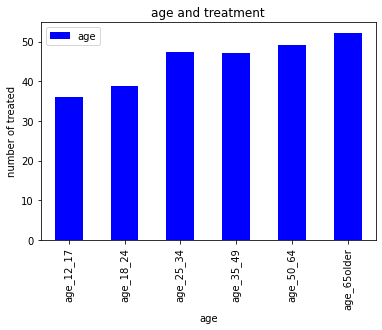

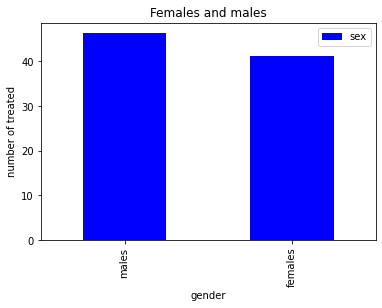

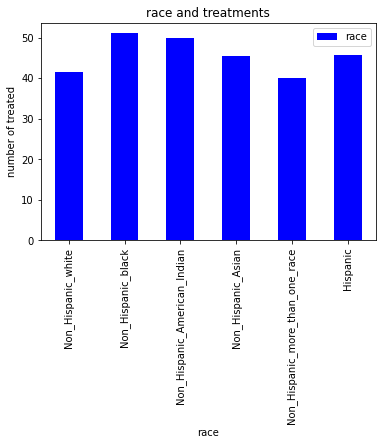

In [ ]:
#treatment-> treated 2
#demographic -> sex ager offtrace
#sex
males=0
females=0

#age
age_12_17=0
age_18_24=0
age_25_34=0
age_35_49=0
age_50_64=0
age_65older=0

#race
Non_Hispanic_white=0
Non_Hispanic_black =0
Non_Hispanic_American_Indian=0
Non_Hispanic_Asian=0
Non_Hispanic_more_than_one_race=0
Hispanic=0

for i in range(len(Personal_Victimization)):
  if Personal_Victimization_copy['treatment'][i]==2:
    if Personal_Victimization_copy['ager'][i]==1:
      age_12_17=age_12_17+1
    else:
        if Personal_Victimization_copy['ager'][i]==2:
           age_18_24=age_18_24+1
        else:
           if Personal_Victimization_copy['ager'][i]==3:
              age_25_34=age_25_34+1
           else:
               if Personal_Victimization_copy['ager'][i]==4:
                  age_35_49=age_35_49+1
               else:
                   if Personal_Victimization_copy['ager'][i]==5:
                      age_50_64=age_50_64+1
                   else:
                      if Personal_Victimization_copy['ager'][i]==6:
                          age_65older=age_65older+1
###########################################################################
#############################3
#age
total_age_12_17=0
total_age_18_24=0
total_age_25_34=0
total_age_35_49=0
total_age_50_64=0
total_age_65older=0

for i in range(len(Personal_Victimization)):
  if (Personal_Victimization_copy['treatment'][i]==2) |(Personal_Victimization_copy['treatment'][i]==1):
    if Personal_Victimization_copy['ager'][i]==1:
      total_age_12_17=total_age_12_17+1
    else:
        if Personal_Victimization_copy['ager'][i]==2:
           total_age_18_24=total_age_18_24+1
        else:
           if Personal_Victimization_copy['ager'][i]==3:
              total_age_25_34=total_age_25_34+1
           else:
               if Personal_Victimization_copy['ager'][i]==4:
                  total_age_35_49=total_age_35_49+1
               else:
                   if Personal_Victimization_copy['ager'][i]==5:
                      total_age_50_64=total_age_50_64+1
                   else:
                      if Personal_Victimization_copy['ager'][i]==6:
                          total_age_65older=total_age_65older+1

##############################

###########################################################################

dictionary_age={"age_12_17":(age_12_17/total_age_12_17)*100,"age_18_24":(age_18_24/total_age_18_24)*100,"age_25_34":(age_25_34/total_age_25_34)*100,"age_35_49":(age_35_49/total_age_35_49)*100,"age_50_64":(age_50_64/total_age_50_64)*100,"age_65older":(age_65older/total_age_65older)*100}

print(age_12_17,age_18_24,age_25_34,age_35_49,age_50_64,age_65older)

for i in range(len(Personal_Victimization)):
  if Personal_Victimization_copy['treatment'][i]==2:
    if Personal_Victimization_copy['sex'][i]==1:
      males=males+1
    else:
        if Personal_Victimization_copy['sex'][i]==2:
           females=females+1

############################################################################
###############################33
total_males=0
total_females=0

for i in range(len(Personal_Victimization)):
  if (Personal_Victimization_copy['treatment'][i]==2) |(Personal_Victimization_copy['treatment'][i]==1):
    if Personal_Victimization_copy['sex'][i]==1:
      total_males=total_males+1
    else:
        if Personal_Victimization_copy['sex'][i]==2:
           total_females=total_females+1

##################################3
############################################################################





dictionary_sex={"males":(males/total_males)*100,"females":(females/total_females)*100}

for i in range(len(Personal_Victimization)):
  if Personal_Victimization_copy['treatment'][i]==2:
        if Personal_Victimization_copy['Race_HispanicOrigin'][i]==1:
           Non_Hispanic_white=Non_Hispanic_white+1
        else:
           if Personal_Victimization_copy['Race_HispanicOrigin'][i]==2:
              Non_Hispanic_black=Non_Hispanic_black+1
           else:
               if Personal_Victimization_copy['Race_HispanicOrigin'][i]==3:
                  Non_Hispanic_American_Indian=Non_Hispanic_American_Indian+1
               else:
                   if Personal_Victimization_copy['Race_HispanicOrigin'][i]==4:
                      Non_Hispanic_Asian=Non_Hispanic_Asian+1
                   else:
                      if Personal_Victimization_copy['Race_HispanicOrigin'][i]==5:
                          Non_Hispanic_more_than_one_race=Non_Hispanic_more_than_one_race+1
                      else:
                          if Personal_Victimization_copy['Race_HispanicOrigin'][i]==6:
                              Hispanic=Hispanic+1
############################################################
###############################################################################3
total_Non_Hispanic_white=0
total_Non_Hispanic_black =0
total_Non_Hispanic_American_Indian=0
total_Non_Hispanic_Asian=0
total_Non_Hispanic_more_than_one_race=0
total_Hispanic=0

for i in range(len(Personal_Victimization)):
  if (Personal_Victimization_copy['treatment'][i]==2) |(Personal_Victimization_copy['treatment'][i]==1):
        if Personal_Victimization_copy['Race_HispanicOrigin'][i]==1:
           total_Non_Hispanic_white=total_Non_Hispanic_white+1
        else:
           if Personal_Victimization_copy['Race_HispanicOrigin'][i]==2:
              total_Non_Hispanic_black=total_Non_Hispanic_black+1
           else:
               if Personal_Victimization_copy['Race_HispanicOrigin'][i]==3:
                  total_Non_Hispanic_American_Indian=total_Non_Hispanic_American_Indian+1
               else:
                   if Personal_Victimization_copy['Race_HispanicOrigin'][i]==4:
                      total_Non_Hispanic_Asian=total_Non_Hispanic_Asian+1
                   else:
                      if Personal_Victimization_copy['Race_HispanicOrigin'][i]==5:
                          total_Non_Hispanic_more_than_one_race=total_Non_Hispanic_more_than_one_race+1
                      else:
                          if Personal_Victimization_copy['Race_HispanicOrigin'][i]==6:
                              total_Hispanic=total_Hispanic+1
################################################################################
############################################################

dictionary_race={"Non_Hispanic_white":(Non_Hispanic_white/total_Non_Hispanic_white)*100,
                 "Non_Hispanic_black":(Non_Hispanic_black/total_Non_Hispanic_black)*100,
                  "Non_Hispanic_American_Indian":(Non_Hispanic_American_Indian/total_Non_Hispanic_American_Indian)*100,
                  "Non_Hispanic_Asian":(Non_Hispanic_Asian/total_Non_Hispanic_Asian)*100,
                  "Non_Hispanic_more_than_one_race":(Non_Hispanic_more_than_one_race/total_Non_Hispanic_more_than_one_race)*100,
                  "Hispanic":(Hispanic/total_Hispanic)*100}
#race???????


print("more likely to recieve treatement : ",max(dictionary_age,key=dictionary_age.get),max(dictionary_sex,key=dictionary_sex.get),max(dictionary_race,key=dictionary_race.get))
df = pd.DataFrame(list(dictionary_age.items()),columns = ['keys','age'])
df.plot(kind ='bar',x ='keys',y ='age',color ='blue')
plt.xlabel("age")
plt.ylabel("number of treated")
plt.title("age and treatment")
plt.show()
###########################################################################################################################################################3
df = pd.DataFrame(list(dictionary_sex.items()),columns = ['keys','sex'])
df.plot(kind ='bar',x ='keys',y ='sex',color ='blue')
plt.xlabel("gender")
plt.ylabel("number of treated")
plt.title("Females and males")
plt.show()
#########################################################################3
df = pd.DataFrame(list(dictionary_race.items()),columns = ['keys','race'])
df.plot(kind ='bar',x ='keys',y ='race',color ='blue')
plt.xlabel("race")
plt.ylabel("number of treated")
plt.title("race and treatments")
plt.show()

2041 2028 1766 1900 820 203
3744 5014
3744 5014 8517
{'males': 53.61592438779894, 'females': 58.87049430550664}
least likely to recieve treatement :  age_12_17 females Non_Hispanic_more_than_one_race


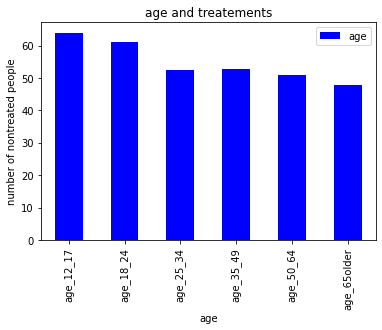

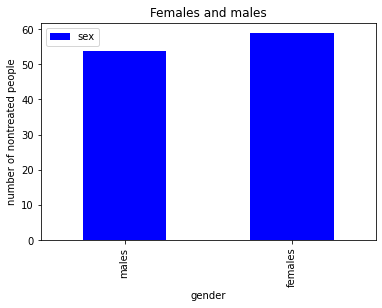

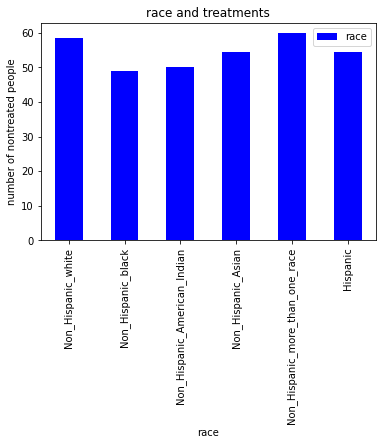

In [ ]:
##treatment-> treated 2
#demographic -> sex ager offtrace
#sex
males=0
females=0

#age
age_12_17=0
age_18_24=0
age_25_34=0
age_35_49=0
age_50_64=0
age_65older=0

#race
Non_Hispanic_white=0
Non_Hispanic_black =0
Non_Hispanic_American_Indian=0
Non_Hispanic_Asian=0
Non_Hispanic_more_than_one_race=0
Hispanic=0


for i in range(len(Personal_Victimization)):
  if Personal_Victimization_copy['treatment'][i]==1:
    if Personal_Victimization_copy['ager'][i]==1:
      age_12_17=age_12_17+1
    else:
        if Personal_Victimization_copy['ager'][i]==2:
           age_18_24=age_18_24+1
        else:
           if Personal_Victimization_copy['ager'][i]==3:
              age_25_34=age_25_34+1
           else:
               if Personal_Victimization_copy['ager'][i]==4:
                  age_35_49=age_35_49+1
               else:
                   if Personal_Victimization_copy['ager'][i]==5:
                      age_50_64=age_50_64+1
                   else:
                      if Personal_Victimization_copy['ager'][i]==6:
                          age_65older=age_65older+1
###########################################################################
#############################3
#age
total_age_12_17=0
total_age_18_24=0
total_age_25_34=0
total_age_35_49=0
total_age_50_64=0
total_age_65older=0

for i in range(len(Personal_Victimization)):
  if (Personal_Victimization_copy['treatment'][i]==2) |(Personal_Victimization_copy['treatment'][i]==1):
    if Personal_Victimization_copy['ager'][i]==1:
      total_age_12_17=total_age_12_17+1
    else:
        if Personal_Victimization_copy['ager'][i]==2:
           total_age_18_24=total_age_18_24+1
        else:
           if Personal_Victimization_copy['ager'][i]==3:
              total_age_25_34=total_age_25_34+1
           else:
               if Personal_Victimization_copy['ager'][i]==4:
                  total_age_35_49=total_age_35_49+1
               else:
                   if Personal_Victimization_copy['ager'][i]==5:
                      total_age_50_64=total_age_50_64+1
                   else:
                      if Personal_Victimization_copy['ager'][i]==6:
                          total_age_65older=total_age_65older+1

##############################

###########################################################################

dictionary_age={"age_12_17":(age_12_17/total_age_12_17)*100,"age_18_24":(age_18_24/total_age_18_24)*100,"age_25_34":(age_25_34/total_age_25_34)*100,"age_35_49":(age_35_49/total_age_35_49)*100,"age_50_64":(age_50_64/total_age_50_64)*100,"age_65older":(age_65older/total_age_65older)*100}



print(age_12_17,age_18_24,age_25_34,age_35_49,age_50_64,age_65older)

for i in range(len(Personal_Victimization)):
  if Personal_Victimization_copy['treatment'][i]==1:
    if Personal_Victimization_copy['sex'][i]==1:
      males=males+1
    else:
        if Personal_Victimization_copy['sex'][i]==2:
           females=females+1
print(males,females)
############################################################################
###############################33
total_males=0
total_females=0

for i in range(len(Personal_Victimization)):
  if (Personal_Victimization_copy['treatment'][i]==2) |(Personal_Victimization_copy['treatment'][i]==1):
    if Personal_Victimization_copy['sex'][i]==1:
      total_males=total_males+1
    else:
        if Personal_Victimization_copy['sex'][i]==2:
           total_females=total_females+1
print(males,females,total_females)
##################################3
############################################################################





dictionary_sex={"males":(males/total_males)*100,"females":(females/total_females)*100}
print(dictionary_sex)

for i in range(len(Personal_Victimization)):
  if Personal_Victimization_copy['treatment'][i]==1:
        if Personal_Victimization_copy['Race_HispanicOrigin'][i]==1:
           Non_Hispanic_white=Non_Hispanic_white+1
        else:
           if Personal_Victimization_copy['Race_HispanicOrigin'][i]==2:
              Non_Hispanic_black=Non_Hispanic_black+1
           else:
               if Personal_Victimization_copy['Race_HispanicOrigin'][i]==3:
                  Non_Hispanic_American_Indian=Non_Hispanic_American_Indian+1
               else:
                   if Personal_Victimization_copy['Race_HispanicOrigin'][i]==4:
                      Non_Hispanic_Asian=Non_Hispanic_Asian+1
                   else:
                      if Personal_Victimization_copy['Race_HispanicOrigin'][i]==5:
                          Non_Hispanic_more_than_one_race=Non_Hispanic_more_than_one_race+1
                      else:
                          if Personal_Victimization_copy['Race_HispanicOrigin'][i]==6:
                              Hispanic=Hispanic+1
###############################################################################3
total_Non_Hispanic_white=0
total_Non_Hispanic_black =0
total_Non_Hispanic_American_Indian=0
total_Non_Hispanic_Asian=0
total_Non_Hispanic_more_than_one_race=0
total_Hispanic=0

for i in range(len(Personal_Victimization)):
  if (Personal_Victimization_copy['treatment'][i]==2) |(Personal_Victimization_copy['treatment'][i]==1):
        if Personal_Victimization_copy['Race_HispanicOrigin'][i]==1:
           total_Non_Hispanic_white=total_Non_Hispanic_white+1
        else:
           if Personal_Victimization_copy['Race_HispanicOrigin'][i]==2:
              total_Non_Hispanic_black=total_Non_Hispanic_black+1
           else:
               if Personal_Victimization_copy['Race_HispanicOrigin'][i]==3:
                  total_Non_Hispanic_American_Indian=total_Non_Hispanic_American_Indian+1
               else:
                   if Personal_Victimization_copy['Race_HispanicOrigin'][i]==4:
                      total_Non_Hispanic_Asian=total_Non_Hispanic_Asian+1
                   else:
                      if Personal_Victimization_copy['Race_HispanicOrigin'][i]==5:
                          total_Non_Hispanic_more_than_one_race=total_Non_Hispanic_more_than_one_race+1
                      else:
                          if Personal_Victimization_copy['Race_HispanicOrigin'][i]==6:
                              total_Hispanic=total_Hispanic+1
################################################################################
############################################################

dictionary_race={"Non_Hispanic_white":(Non_Hispanic_white/total_Non_Hispanic_white)*100,
                 "Non_Hispanic_black":(Non_Hispanic_black/total_Non_Hispanic_black)*100,
                  "Non_Hispanic_American_Indian":(Non_Hispanic_American_Indian/total_Non_Hispanic_American_Indian)*100,
                  "Non_Hispanic_Asian":(Non_Hispanic_Asian/total_Non_Hispanic_Asian)*100,
                  "Non_Hispanic_more_than_one_race":(Non_Hispanic_more_than_one_race/total_Non_Hispanic_more_than_one_race)*100,
                  "Hispanic":(Hispanic/total_Hispanic)*100}
#race???????
#race???????

print("least likely to recieve treatement : ",max(dictionary_age,key=dictionary_age.get),max(dictionary_sex,key=dictionary_sex.get),max(dictionary_race,key=dictionary_race.get))


df = pd.DataFrame(list(dictionary_age.items()),columns = ['keys','age'])
df.plot(kind ='bar',x ='keys',y ='age',color ='blue')
plt.xlabel("age")
plt.ylabel("number of nontreated people")
plt.title("age and treatements")
plt.show()
###########################################################################################################################################################3
df = pd.DataFrame(list(dictionary_sex.items()),columns = ['keys','sex'])
df.plot(kind ='bar',x ='keys',y ='sex',color ='blue')
plt.xlabel("gender")
plt.ylabel("number of nontreated people")
plt.title("Females and males")
plt.show()
#########################################################################3
df = pd.DataFrame(list(dictionary_race.items()),columns = ['keys','race'])
df.plot(kind ='bar',x ='keys',y ='race',color ='blue')
plt.xlabel("race")
plt.ylabel("number of nontreated people")
plt.title("race and treatments")
plt.show()

Which class of crimes is associated with the highest rate of
same-offense-recidivism; i.e. prison re-entry for the same offense within 3
years of release?

In [ ]:
Georgea_data.columns
Georgea_data['prison_offense']
Georgea_data['recidivism_within_3years']
cols=['prison_offense','recidivism_within_3years']
Georgea_data_copy=Georgea_data
Georgea_data_copy['recidivism_within_3years'] = Georgea_data_copy['recidivism_within_3years'].replace({ 'TRUE': 1,'FALSE': 0})
Georgea_data_copy['prison_offense'] = Georgea_data_copy['prison_offense'].replace({'Drug':1 ,'Violent/Non-Sex':2 ,'Property':3 ,'Other' :4,'Violent/Sex':5})
Georgea_data_copy['recidivism_within_3years'].head

<bound method NDFrame.head of 0        False
1         True
2         True
3        False
4         True
         ...  
25830     True
25831     True
25832     True
25833    False
25834     True
Name: recidivism_within_3years, Length: 25835, dtype: bool>

In [ ]:
Georgea_data_copy['prison_offense'].head
Georgea_data['prison_offense'].head


<bound method NDFrame.head of 0        1
1        2
2        1
3        3
4        2
        ..
25830    3
25831    3
25832    3
25833    3
25834    3
Name: prison_offense, Length: 25835, dtype: int64>

[1 2 3 4 5]
higher rate offenses :  Property


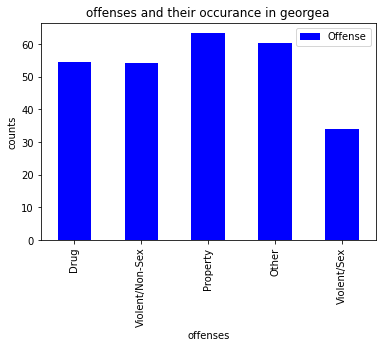

In [ ]:
georgea_offenses=Georgea_data_copy['prison_offense'].unique()
print(georgea_offenses)
Drug=0
Violent_Non_Sex=0
Property=0
Other =0
Violent_Sex=0

for i in range(len(Georgea_data_copy)):
  if Georgea_data_copy['recidivism_within_3years'][i]==1:
    if Georgea_data_copy['prison_offense'][i]==1:
      Drug=Drug+1
    else:
        if Georgea_data_copy['prison_offense'][i]==2:
           Violent_Non_Sex=Violent_Non_Sex+1
        else:
           if Georgea_data_copy['prison_offense'][i]==3:
              Property=Property+1
           else:
               if Georgea_data_copy['prison_offense'][i]==4:
                  Other=Other+1
               else:
                   if Georgea_data_copy['prison_offense'][i]==5:
                      Violent_Sex=Violent_Sex+1
#####################################################################################
totalDrug=0
totalViolent_Non_Sex=0
totalProperty=0
totalOther =0
totalViolent_Sex=0

for i in range(len(Georgea_data_copy)):
  if (Georgea_data_copy['recidivism_within_3years'][i]==1)|(Georgea_data_copy['recidivism_within_3years'][i]==0):
    if Georgea_data_copy['prison_offense'][i]==1:
      totalDrug=totalDrug+1
    else:
        if Georgea_data_copy['prison_offense'][i]==2:
           totalViolent_Non_Sex=totalViolent_Non_Sex+1
        else:
           if Georgea_data_copy['prison_offense'][i]==3:
              totalProperty=totalProperty+1
           else:
               if Georgea_data_copy['prison_offense'][i]==4:
                  totalOther=totalOther+1
               else:
                   if Georgea_data_copy['prison_offense'][i]==5:
                      totalViolent_Sex=totalViolent_Sex+1
###################################################################################
dictionary_offenses={ "Drug":(Drug/totalDrug) *100 ,
                     "Violent/Non-Sex":(Violent_Non_Sex/totalViolent_Non_Sex)*100 ,
                     "Property":(Property/totalProperty)*100 ,
                     "Other" : (Other/totalOther)*100,
                     "Violent/Sex":(Violent_Sex/totalViolent_Sex)*100}
print("higher rate offenses : ",max(dictionary_offenses,key=dictionary_offenses.get))

df = pd.DataFrame(list(dictionary_offenses.items()),columns = ['keys','Offense'])
df.plot(kind ='bar',x ='keys',y ='Offense',color ='blue')
plt.xlabel("offenses")
plt.ylabel("counts")
plt.title("offenses and their occurance in georgea")
plt.show()

Are prisoners who are younger at the time of release more or less likely to
reoffend than those who are older?

# **PART 4: Hypothesis Testing:**
Considering that the strictness of applying rules can be measured from the total of all rules in the column (lawtotal)

## **4.1 Formulate a hypothesis test to assess the validity of this claim given the available data:**

1. **Defining Hypothesis:**
All the data are obtained from the different states, so the data is unpaired.

H₀: μₛ≤μₐ
H₁: μₛ>μₐ

**H₀: The data is normally distributed.**
<BR>**H₁: The data is not normally distributed.**

**Assuming that the significance level (α) = 0.05.**

**If the p-value is >0.05, it can be said that data is normally distributed.**

**For checking normality, We used SKolmogorov-Smirnov test.**

In [ ]:
Strictness = Fire_arm[["state" ,"lawtotal"]]

In [ ]:
Strictness

,state,lawtotal
0,Alabama,15
1,Alabama,16
2,Alabama,16
3,Alabama,16
4,Alabama,16
...,...,...
1495,Wyoming,8
1496,Wyoming,8
1497,Wyoming,7
1498,Wyoming,7


In [ ]:
FBI['state name'].replace({'HI': 'Hawaii',
                      'DE': 'Delaware',
                      'PR': 'Puerto Rico',
                      'TX': 'Texas',
                      'MA': 'Massachusetts',
                      'MD': 'Maryland',
                      'ME': 'Maine',
                      'IA': 'Iowa',
                      'ID': 'Idaho',
                      'MI': 'Michigan',
                      'UT': 'Utah',
                      'MN': 'Minnesota',
                      'MO': 'Missouri',
                      'IL': 'Illinois',
                      'IN': 'Indiana',
                      'MS': 'Mississippi',
                      'MT': 'Montana',
                      'AK': 'Alaska',
                      'VA': 'Virginia',
                      'AL': 'Alabama',
                      'AR': 'Arkansas',
                      'VI': 'U.S. Virgin Islands',
                      'NC': 'North Carolina',
                      'ND': 'North Dakota',
                      'RI': 'Rhode Island',
                      'NE': 'Nebraska',
                      'AZ': 'Arizona',
                      'NH': 'New Hampshire',
                      'NJ': 'New Jersey',
                      'VT': 'Vermont',
                      'NM': 'New Mexico',
                      'FL': 'Florida',
                      'NV': 'Nevada',
                      'WA': 'Washington',
                      'NY': 'New York',
                      'SC': 'South Carolina',
                      'SD': 'South Dakota',
                      'WI': 'Wisconsin',
                      'OH': 'Ohio',
                      'GA': 'Georgia',
                      'OK': 'Oklahoma',
                      'CA': 'California',
                      'WV': 'West Virginia',
                      'WY': 'Wyoming',
                      'OR': 'Oregon',
                      'GM': 'Guam',
                      'KS': 'Kansas',
                      'CO': 'Colorado',
                      'KY': 'Kentucky',
                      'PA': 'Pennsylvania',
                      'CT': 'Connecticut',
                      'LA': 'Louisiana',
                      'TN': 'Tennessee',
                      'DC': 'District of Columbia'},inplace = True)

In [ ]:
FBI

,state name,year,offense,offense count,Unnamed: 4
0,Hawaii,2018,aggravated-assault,1307,NaN
1,Hawaii,2019,aggravated-assault,1343,NaN
2,Hawaii,2020,aggravated-assault,1307,NaN
3,Hawaii,2021,aggravated-assault,1418,NaN
4,Hawaii,2018,all-other-larceny,8343,NaN
...,...,...,...,...,...
139971,District of Columbia,2019,all-offenses,108,NaN
139972,District of Columbia,2020,all-offenses,77,NaN
139973,District of Columbia,2021,all-offenses,1497,NaN
139974,District of Columbia,2021,all-offenses,47,NaN


In [ ]:
Strictness_ = Strictness.sort_values(by = 'state')

In [ ]:
Strictness_

,state,lawtotal
0,Alabama,15
29,Alabama,10
28,Alabama,10
27,Alabama,10
26,Alabama,10
...,...,...
1471,Wyoming,7
1470,Wyoming,7
1498,Wyoming,7
1483,Wyoming,9


In [ ]:
FBI_Crimes = FBI[['state name','offense count']]

In [ ]:
FBI_Crimes

,state name,offense count
0,Hawaii,1307
1,Hawaii,1343
2,Hawaii,1307
3,Hawaii,1418
4,Hawaii,8343
...,...,...
139971,District of Columbia,108
139972,District of Columbia,77
139973,District of Columbia,1497
139974,District of Columbia,47


In [ ]:
FBI_Crimes_ = FBI_Crimes.sort_values(by = 'state name')

In [ ]:
FBI_Crimes_

,state name,offense count
55568,Alabama,19
55218,Alabama,160
55217,Alabama,286
55216,Alabama,6
55215,Alabama,1
...,...,...
110146,Wyoming,18
110145,Wyoming,5
110144,Wyoming,7
110155,Wyoming,291


In [ ]:
from scipy.stats import kstest

Significance_Level = 0.05

test_stat_normality, Strictness_p_value_normality = (kstest(Strictness_['lawtotal'], cdf='norm'))

print("p value:%.4f" % Strictness_p_value_normality)

if Strictness_p_value_normality < Significance_Level:
    print("Reject null hypothesis >> The data of Strictness is not normally distributed")
else:
    print("Not Reject null hypothesis >> The data of Strictness is normally distributed")


p value:0.0000
Reject null hypothesis >> The data of Strictness is not normally distributed


In [ ]:
test_stat_normality, CrimeRate_p_value_normality = (kstest(FBI_Crimes_['offense count'], cdf='norm'))

print("p value:%.4f" % CrimeRate_p_value_normality)

if CrimeRate_p_value_normality < Significance_Level:
    print("Reject null hypothesis >> The data of  Crime Rate is not normally distributed")
else:
    print("Not Reject null hypothesis >> The data of  Crime Rate is normally distributed")


p value:0.0000
Reject null hypothesis >> The data of  Crime Rate is not normally distributed


**The second assumption is:**

**H₀: The variances of the samples are the same.**

**H₁: The variances of the samples are different.**

In [ ]:
import scipy
Strict = np.array(Strictness_['lawtotal'])
Crime =  np.array(FBI_Crimes_['offense count'])
test_stat_var, p_value_var= scipy.stats.levene(Strict,Crime)
print("p value:%.4f" % p_value_var)
if p_value_var < Significance_Level:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Not Reject null hypothesis >> The variances of the samples are same.")

p value:0.0000
Reject null hypothesis >> The variances of the samples are different.


**Performing the parametric version of the test for 2 groups and unpaired data:**



In [ ]:
ttest,p_value = scipy.stats.ttest_ind(Strict,Crime)
print("p value:%.8f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 < Significance_Level:
    print("Reject null hypothesis")
else:
    print("Not Reject null hypothesis")

p value:0.00000000
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0000
Reject null hypothesis


## **4.2 Come up with your own claim and formulate a hypothesis test to assess it following in the same steps:**

**Our Own Claim is that:**


*   **Female victims are most probably attacked by female offenders too!!**



In [ ]:
Victims = Personal_Victimization[["sex"]]
Offenders = Personal_Victimization[["offendersex"]]

In [ ]:
test_stat_normality, Vict_p_value_normality = (kstest(Victims, cdf='norm'))

print("p value:%.4f" % Vict_p_value_normality)

if Vict_p_value_normality < Significance_Level:
    print("Reject null hypothesis >> The data of Victims is not normally distributed")
else:
    print("Not Reject null hypothesis >> The data of Victims is normally distributed")


In [ ]:
test_stat_normality, Off_p_value_normality = (kstest(Offenders, cdf='norm'))

print("p value:%.4f" % Off_p_value_normality)

if Off_p_value_normality < Significance_Level:
    print("Reject null hypothesis >> The data of Offenders is not normally distributed")
else:
    print("Not Reject null hypothesis >> The data of Offenders is normally distributed")


In [ ]:
test_stat_var, p_value_var_= scipy.stats.levene(Victims,Offenders)
print("p value:%.4f" % p_value_var_)
if p_value_var_ < Significance_Level:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Not Reject null hypothesis >> The variances of the samples are same.")

In [ ]:
ttest,p_value_ = scipy.stats.ttest_ind(Victims,Offenders)
print("p value:%.8f" % p_value_)
print("since the hypothesis is one sided >> use p_value_/2 >> p_value__one_sided:%.4f" %(p_value_/2))
if p_value_/2 < Significance_Level:
    print("Reject null hypothesis")
else:
    print("Not Reject null hypothesis")

# **Part 5**

In [ ]:
print(Georgea_data[['prison_years','prior_conviction_episodes', 'prior_conviction_episodes_1', 'prior_conviction_episodes_2', 'prior_conviction_episodes_3','prior_conviction_episodes_4','prior_conviction_episodes_5','prior_conviction_episodes_6','prior_conviction_episodes_7','race','gang_affiliated','age_at_release']].corr())
print(Georgea_data[['prison_years']].corr())

# Select the features and target
x =  Georgea_data[['prior_conviction_episodes', 'prior_conviction_episodes_1', 'prior_conviction_episodes_2', 'prior_conviction_episodes_3','prior_conviction_episodes_4','prior_conviction_episodes_5','prior_conviction_episodes_6','prior_conviction_episodes_7','race','gang_affiliated','age_at_release']]
#y = Georgea_data['prison_offense']
Georgea_data['prison_years'] = Georgea_data['prison_years'].replace({"Less than 1 year":1,"1-2 years":2,"Greater than 2 to 3 years":3,"More than 3 years":4})
y = Georgea_data['prison_years']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
#x.shape, y.shape
print(linear_reg.coef_) ##coefficients
print("Accuracy is:",100-mean_squared_error(y_test, linear_reg.predict(x_test)))
lm = sm.OLS(y, x.astype(float) )
results = lm.fit()
print(results.summary())
print(Georgea_data[['prison_years','prior_conviction_episodes', 'prior_conviction_episodes_1', 'prior_conviction_episodes_2', 'prior_conviction_episodes_3','prior_conviction_episodes_4','prior_conviction_episodes_5','prior_conviction_episodes_6','prior_conviction_episodes_7','race','gang_affiliated','age_at_release']].corr())


                             prior_conviction_episodes_2  \
prior_conviction_episodes_2                     1.000000   
prior_conviction_episodes_5                     0.089750   
prior_conviction_episodes_6                     0.367193   
prior_conviction_episodes_7                     0.113235   
race                                            0.111781   
gang_affiliated                                 0.064032   
age_at_release                                  0.097479   

                             prior_conviction_episodes_5  \
prior_conviction_episodes_2                     0.089750   
prior_conviction_episodes_5                     1.000000   
prior_conviction_episodes_6                     0.086955   
prior_conviction_episodes_7                     0.036715   
race                                           -0.044273   
gang_affiliated                                -0.040783   
age_at_release                                  0.218494   

                             prior_con

NameError: ignored